# Maze Building with K-Means-Clustering

In [1]:
# !pip install simplification;
# !pip install scikit-learn shapely simplification;
# !pip install networkx scipy;
# !pip install yellowbrick;

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


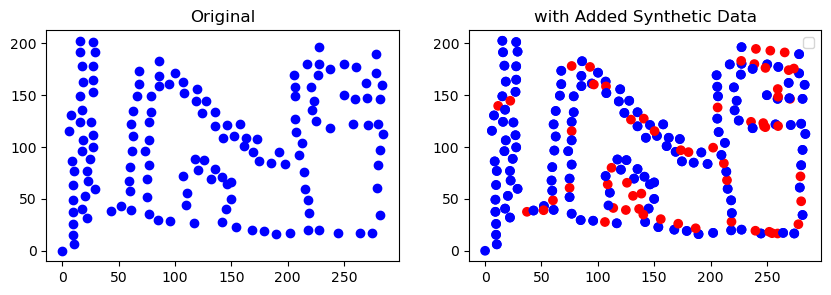

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# points = [(4.64, 1.76), (9.36, 2.25), (20.86, 11.01), (39.9, 8.63), (71.65, 7.84), (54.19, 8.63), (112.12, 10.22), (91.49, 12.6), (132.75, 7.84), (139.89, 18.95), (141.48, 32.44), (135.13, 65.77), (135.13, 49.1), (135.93, 87.19), (135.13, 111), (134.34, 123.7), (157.35, 124.49), (150.21, 113.38), (150, 100), (156.56, 87.99), (164.5, 61.01), (154.18, 71.32), (166.88, 45.93), (167.67, 26.88), (159.73, 3.07), (156.56, 17.36), (206.55, 22.91), (191.48, 14.19), (181.16, 7.04), (223.22, 21.33), (241.47, 35.61), (259.72, 53.86), (288.29, 76.08), (288.29, 61.8), (300, 50), (294.64, 37.2), (299.4, 20.53), (305.75, 7.84), (324.8, 22.12), (320.04, 33.23), (324, 62.59), (301.78, 72.12), (268.45, 75.29), (247.82, 62.59), (239.09, 52.28), (216.08, 42.75), (186.72, 33.23), (147.83, 139.57), (150, 150), (159.73, 176.87), (147.83, 176.08), (143.07, 192.74), (127.2, 187.98), (112.91, 192.74), (95.45, 190.36), (50, 200), (24.03, 213.37), (11.33, 243.53), (34.35, 241.94), (35.14, 228.45), (74.03, 210.99), (115.29, 107.83), (71.65, 111.8), (39.11, 110.21), (27.21, 109.41), (7.37, 110.21), (222.43, 153.86), (200, 150), (179.57, 135.6), (251.79, 157.82), (282.74, 179.25)]
# points = [(0, 0), (15.74, 12.24), (26.51, 20.61), (38.46, 29.58), (42.65, 43.93), (38.46, 62.47), (36.07, 89.98), (38.46, 121.07), (42.65, 150.97), (44.44, 171.3), (61.79, 170.11), (80.32, 169.51), (92.88, 168.91), (113.81, 164.72), (113.81, 150.37), (112.02, 133.03), (112.61, 123.46), (113.21, 109.11), (112.02, 94.76), (113.81, 77.42), (119.19, 61.28), (126.96, 53.5), (134.74, 41.54), (150, 50), (141.91, 60.08), (131.15, 84.6), (126.96, 109.71), (147.89, 112.7), (165.23, 114.5), (204.1, 114.5), (187.36, 116.89), (204.7, 139.61), (208.89, 159.94), (213.67, 187.45), (211.88, 214.36), (211.28, 228.11), (211.88, 243.06), (191.55, 243.06), (178.39, 243.66), (155.67, 243.66), (143.11, 229.9), (122.78, 248.44), (122.18, 233.49), (100, 250), (88.1, 242.46), (86.9, 231.1), (86.3, 220.34), (82.12, 209.57), (79.72, 192.83), (92.88, 188.64), (110.82, 188.64), (124.57, 185.65), (125.17, 176.09), (135.93, 174.29), (152.68, 174.89), (176, 172.5), (193.94, 169.51), (228.62, 170.11), (277.06, 166.52), (248.95, 168.91), (299.78, 161.14), (289.61, 145.59), (290.21, 130.64), (283.04, 118.68), (269.28, 116.89), (242.97, 119.28), (225.63, 119.28), (210.68, 103.73), (186.76, 104.93), (100.65, 110.91), (89.89, 110.31), (79.13, 111.51), (73.75, 112.1), (61.19, 112.7), (51.62, 112.7), (50, 100), (55.21, 87.59), (51.62, 75.03), (50, 50), (50.42, 61.87), (54.01, 37.95), (70.16, 40.35), (82.71, 37.36), (114.41, 39.15), (99.46, 43.34), (145.5, 35.56), (157.46, 37.95), (183.77, 35.56), (205.3, 33.77), (233.4, 27.19), (260.31, 29.58), (292.6, 28.99)]
points = [(0, 0), (10.38, 6.2), (9.76, 15.43), (9.76, 25.89), (9.15, 37.57), (9.15, 49.26), (9.76, 63.41), (10.38, 76.95), (8.53, 86.18), (17.14, 96.02), (18.37, 106.48), (6.07, 115.7), (7.92, 130.47), (15.3, 148.93), (18.37, 163.08), (17.14, 178.46), (15.91, 191.37), (15.3, 202.45), (27.6, 201.22), (28.83, 191.99), (27.6, 177.84), (27.6, 164.92), (26.99, 153.23), (17.76, 136.01), (15.91, 124.32), (25.14, 123.7), (26.99, 111.4), (27.6, 99.71), (24.53, 88.64), (22.07, 76.95), (22.68, 67.72), (28.83, 59.72), (20.22, 52.95), (17.76, 40.65), (22.07, 32.04), (52.21, 43.11), (42.98, 38.8), (60.82, 39.42), (59.59, 57.88), (58.98, 67.72), (59.59, 80.64), (61.44, 96.63), (62.67, 110.17), (60.82, 121.86), (62.67, 134.78), (66.36, 149.54), (67.59, 160.61), (67.59, 173.53), (86.05, 182.76), (100.2, 171.69), (106.96, 163.08), (94.66, 161.23), (119.88, 155.69), (127.88, 144.62), (135.26, 133.55), (146.34, 121.24), (152.49, 110.78), (161.1, 100.94), (169.1, 95.4), (191.86, 94.79), (212.78, 104.02), (207.24, 114.47), (206.01, 127.39), (206.63, 148.93), (206.01, 158.15), (205.4, 169.23), (217.09, 179.69), (227.54, 180.3), (250.31, 179.69), (237.39, 175.38), (260.15, 177.23), (278.61, 171.07), (283.53, 160), (281.68, 146.47), (259.53, 146.47), (269.99, 147.08), (250, 150), (269.38, 161.85), (278.61, 189.53), (227.54, 196.3), (226.93, 169.84), (220.78, 157.54), (223.24, 144.62), (221.39, 135.39), (225.08, 125.55), (257.69, 121.86), (237.39, 118.17), (271.22, 121.24), (280.45, 122.47), (284.14, 112.63), (281.68, 97.25), (280.45, 82.48), (279.22, 60.95), (281.68, 34.5), (274.3, 16.66), (244.77, 16.66), (264.46, 17.27), (227.54, 20.35), (218.32, 19.73), (218.93, 36.34), (218.32, 48.65), (215.24, 59.72), (214.01, 76.33), (209.7, 92.33), (197.4, 83.71), (185.09, 84.94), (174.64, 86.18), (172.79, 107.71), (162.95, 108.94), (158.03, 121.86), (142.65, 108.94), (135.26, 120.01), (123.57, 132.93), (118.65, 144), (107.58, 152), (85.43, 168.61), (85.43, 158.77), (78.66, 148.93), (78.66, 133.55), (76.82, 124.32), (76.82, 106.48), (73.74, 96.02), (76.82, 83.1), (74.97, 69.56), (74.97, 51.72), (76.82, 35.73), (84.82, 29.58), (95.89, 28.96), (116.81, 26.5), (110.66, 56.03), (106.96, 72.03), (117.42, 88.02), (125.42, 87.41), (135.26, 78.79), (141.42, 71.41), (146.34, 64.03), (150.03, 65.87), (150, 50), (145.11, 40.65), (132.19, 69.56), (120.5, 78.18), (142.03, 27.73), (153.72, 22.81), (167.87, 20.35), (178.94, 19.12), (189.4, 16.04), (202.32, 17.27), (109.42, 43.73)]

# # fill with synthetic data which are midpoints between the points above
# points_with_synthetic = []
# for i in range(len(points) - 1):
#     points_with_synthetic.append(points[i])
#     points_with_synthetic.append(((points[i][0] + points[i + 1][0]) / 2, (points[i][1] + points[i + 1][1]) / 2))
# points_with_synthetic.append(points[-1])

# print(points)
# opt = 13

# first compute average distance
avg_distance = np.mean([np.linalg.norm(np.array(points[i]) - np.array(points[i+1])) 
                        for i in range(len(points) - 1)])

colors = []

points_with_synthetic = []
for i in range(len(points) - 1):
    points_with_synthetic.append(points[i])
    colors.append('b')
    
    # compute the distance between the current point and the next one
    dist = np.linalg.norm(np.array(points[i]) - np.array(points[i+1]))
    
    # if the distance is greater than the average, insert more points
    if dist > avg_distance:
        num_inserts = int(dist // avg_distance)  # compute how many points to insert
        for j in range(1, num_inserts+1):
            # compute the coordinates of the new point
            new_point = ((j / (num_inserts + 1)) * np.array(points[i+1]) 
                         + (1 - j / (num_inserts + 1)) * np.array(points[i]))
            points_with_synthetic.append(tuple(new_point))
            colors.append('r')
            
    points_with_synthetic.append(points[i+1]) 
    colors.append('b')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
data = np.array(points)
data_synthetic = np.array(points_with_synthetic)
axs[0].set_title('Original')
axs[0].scatter(data[:, 0], data[:, 1], c='b')
axs[1].set_title('with Added Synthetic Data')
axs[1].scatter(data_synthetic[:, 0], data_synthetic[:, 1], c=colors)
plt.legend()


points = points_with_synthetic


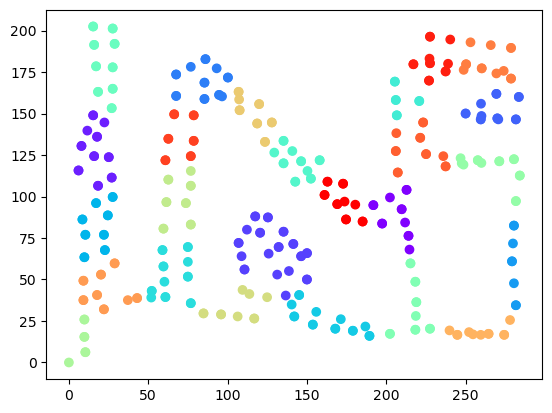

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Assume data is a 2D numpy array where each row is a point (x, y)
data = np.array(points)
# Define the number of clusters
n_clusters = 25

# Use KMeans to cluster points
kmeans = KMeans(n_clusters=n_clusters).fit(data)
labels = kmeans.labels_

# Plot the points colored by cluster
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.show()


# Joining clusters: 
Using Shortest Distance `cdist` to find the shortest path between any two points from two different clusters.
Then, join the points with an edge.

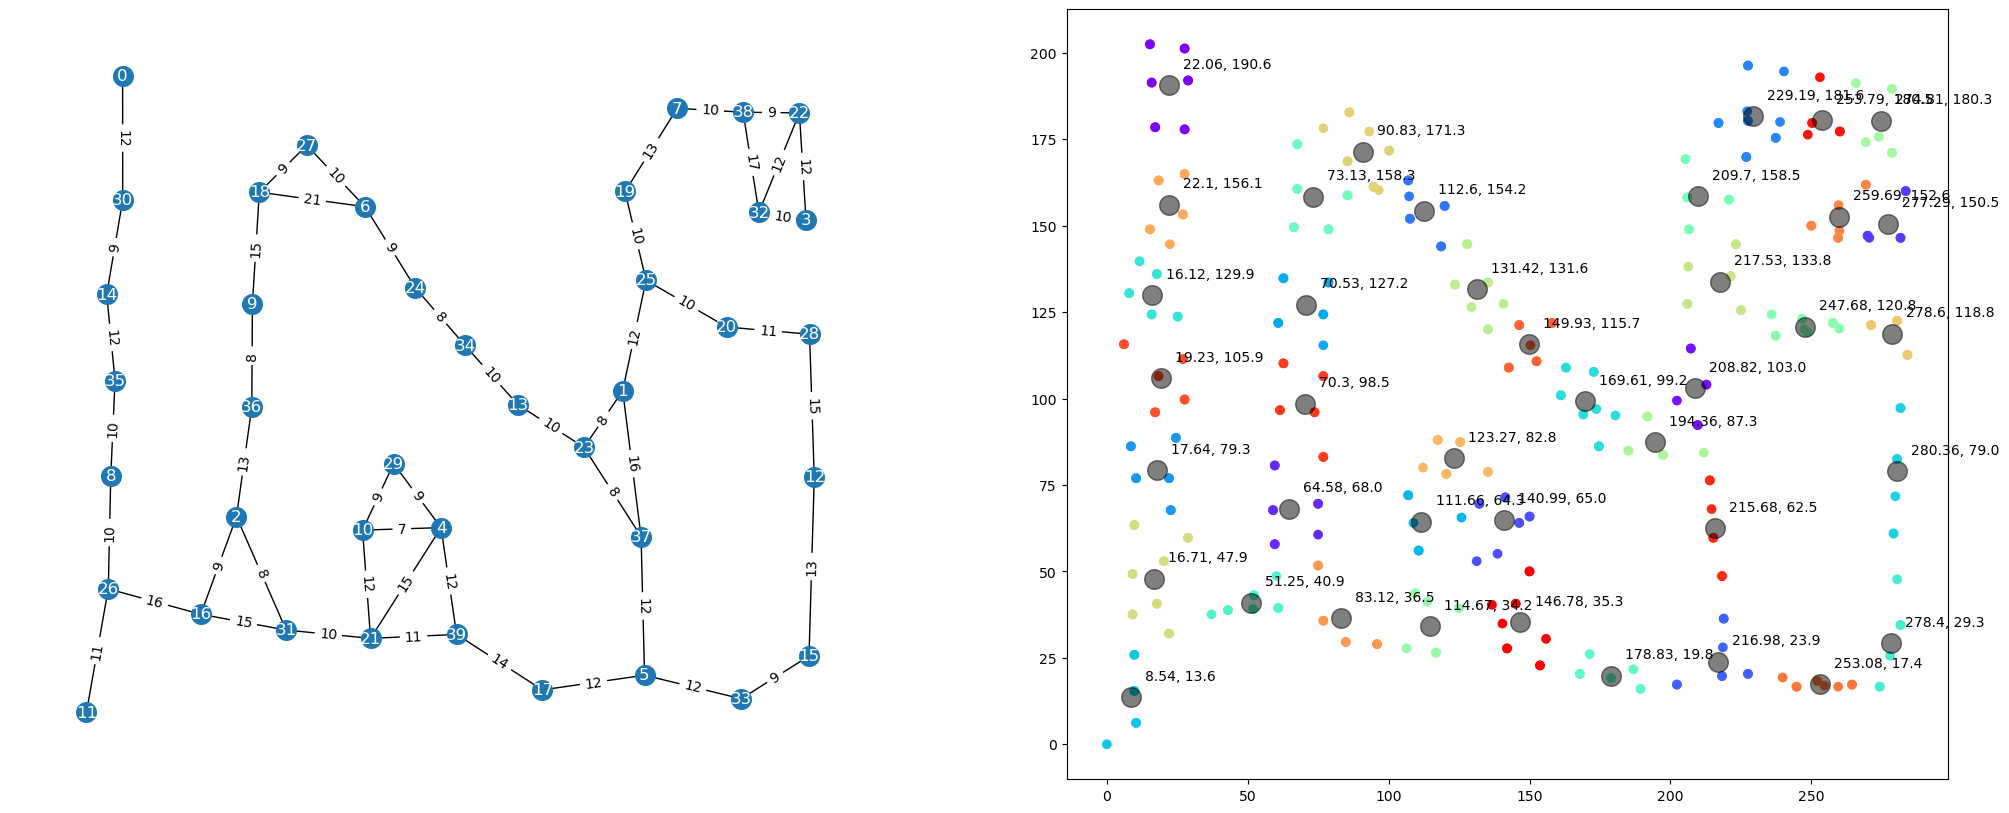

{(22.06, 190.56): {(22.1, 156.1): 12.92}, (208.82, 103.01): {(194.36, 87.32): 8.29, (217.53, 133.78): 12.98, (215.68, 62.49): 16.57}, (64.58, 68.03): {(51.25, 40.89): 9.25, (83.12, 36.5): 8.92, (70.3, 98.48): 13.67}, (277.29, 150.51): {(274.81, 180.32): 12.11, (259.69, 152.64): 10.1}, (140.99, 64.98): {(111.66, 64.29): 7.46, (114.67, 34.17): 15.05, (123.27, 82.76): 9.61, (146.78, 35.28): 12.45}, (216.98, 23.94): {(178.83, 19.85): 12.98, (253.08, 17.39): 12.35, (215.68, 62.49): 12.33}, (112.6, 154.22): {(73.13, 158.28): 21.84, (131.42, 131.61): 9.25, (90.83, 171.3): 10.82}, (229.19, 181.59): {(209.7, 158.46): 13.75, (253.79, 180.51): 10.51}, (17.64, 79.29): {(16.71, 47.94): 10.09, (19.23, 105.86): 10.44}, (70.53, 127.16): {(73.13, 158.28): 15.21, (70.3, 98.48): 8.92}, (111.66, 64.29): {(140.99, 64.98): 7.46, (114.67, 34.17): 12.36, (123.27, 82.76): 9.55}, (8.54, 13.58): {(16.71, 47.94): 11.7}, (280.36, 79.01): {(278.4, 29.27): 13.28, (278.6, 118.78): 15.58}, (169.61, 99.2): {(194.36, 87

In [15]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import networkx as nx

data = np.array(points_with_synthetic)

# Define the number of clusters
n_clusters = 40

# Use KMeans to cluster points
kmeans = KMeans(n_clusters=n_clusters).fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a list of clusters where each cluster is a list of its points
clusters = [data[labels == i] for i in range(n_clusters)]

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for i, center in enumerate(centers):
    G.add_node(i, pos=center)

# Define a distance threshold for adjacency
threshold = 22

# For each pair of clusters
for i in range(n_clusters):
    for j in range(i + 1, n_clusters):  # avoid duplicate comparisons and self-comparisons
        # Compute the distances between all points in the two clusters
        distances = cdist(clusters[i], clusters[j])
        x = np.min(distances)
        # print(f"shortest distance between {i} and {j} is {x}")
        # If the minimum distance is less than the threshold, add an edge
        if np.min(distances) < threshold:
            G.add_edge(i, j, weight=np.min(distances))

# PLOT
fig, axs = plt.subplots(1, 2, figsize=(25, 10));
pos = nx.get_node_attributes(G, 'pos')
# nx.draw(G, pos, with_labels=True, ax=axs[0])
nx.draw(G, pos, with_labels=True, node_size=200, ax=axs[0], font_color = 'white')
labels = nx.get_edge_attributes(G, 'weight')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axs[0]);

# Plot the points colored by cluster
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_ ,cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# label the centres with their x,y coordinates
for i, center in enumerate(centers):
    plt.text(center[0]+5, center[1]+5, str(f"{round(center[0], 2)}, {round(center[1], 1)}"), fontsize=10)
plt.show()

# # create an adjacency dictionary of nodes and edges
# adjacency_dict = {node: list(G.neighbors(node)) for node in G.nodes()}

# print(adjacency_dict)

# # create a list of edges and their weights
# edges = [(node, neighbor, G[node][neighbor]['weight']) for node in G.nodes() for neighbor in G.neighbors(node)]
# print(edges)

# # print node_pos with values converted from np.array to list
# print({node: G.nodes[node]['pos'].tolist() for node in G.nodes()})

# #output a graph dictionary including node pos in the form:
# # graph = {(node_x_coordinate, node_y_coordinate): {(neighbour_x_coordinate, neighbour_y_coordinate): weight, ...}, ...}


# Define node positions with 2 decimal places
node_pos = {node: tuple(np.round(pos, 2)) for node, pos in nx.get_node_attributes(G, 'pos').items()}

# Convert graph to a dictionary
graph_dict = nx.to_dict_of_dicts(G)

# Replace nodes with positions and convert adjacency nodes to positions as well
# Also round the weights to 2 decimal places
graph = {node_pos[node]: {node_pos[neigh]: round(data['weight'], 2) for neigh, data in neigh_data.items()} for node, neigh_data in graph_dict.items()}

print(graph)



# Adding extreme points instead of using just centroids

Every cluster is either tall, wide, or square (junction).
Based on its shape, extreme points of the cluster are taken.
Clusters are interconnected with their extreme points to form line segments, if the their distances are within the intra-cluster-threshold.

Every cluster has extreme points, centre nodes, and normal nodes.
Two clusters are considered adjacent IF they contain any nodes that are within the inter-cluster-threshold distance apart.

Example:  if cluster A contains (0,0), (1,0), and (2,0), and cluster B contains (8,0), (9,0), and (10,0), and the threshold distance is 7, then cluster A and cluster B are adjacent because (2,0) and (8,0) have a distance of 6.

There are different ways to join two adjacent clusters. 

For this code a rule is added so that inter-cluster-edges can only be drawn between eligible nodes, nodes that are either extreme nodes or centre nodes. 
And to connect two adjacent clusters, the edge that is drawn must be the shortest the distance between their eligible nodes. 
One connection between two eligible nodes (one for each cluster) is all that is needed to connect two adjacent clusters. 


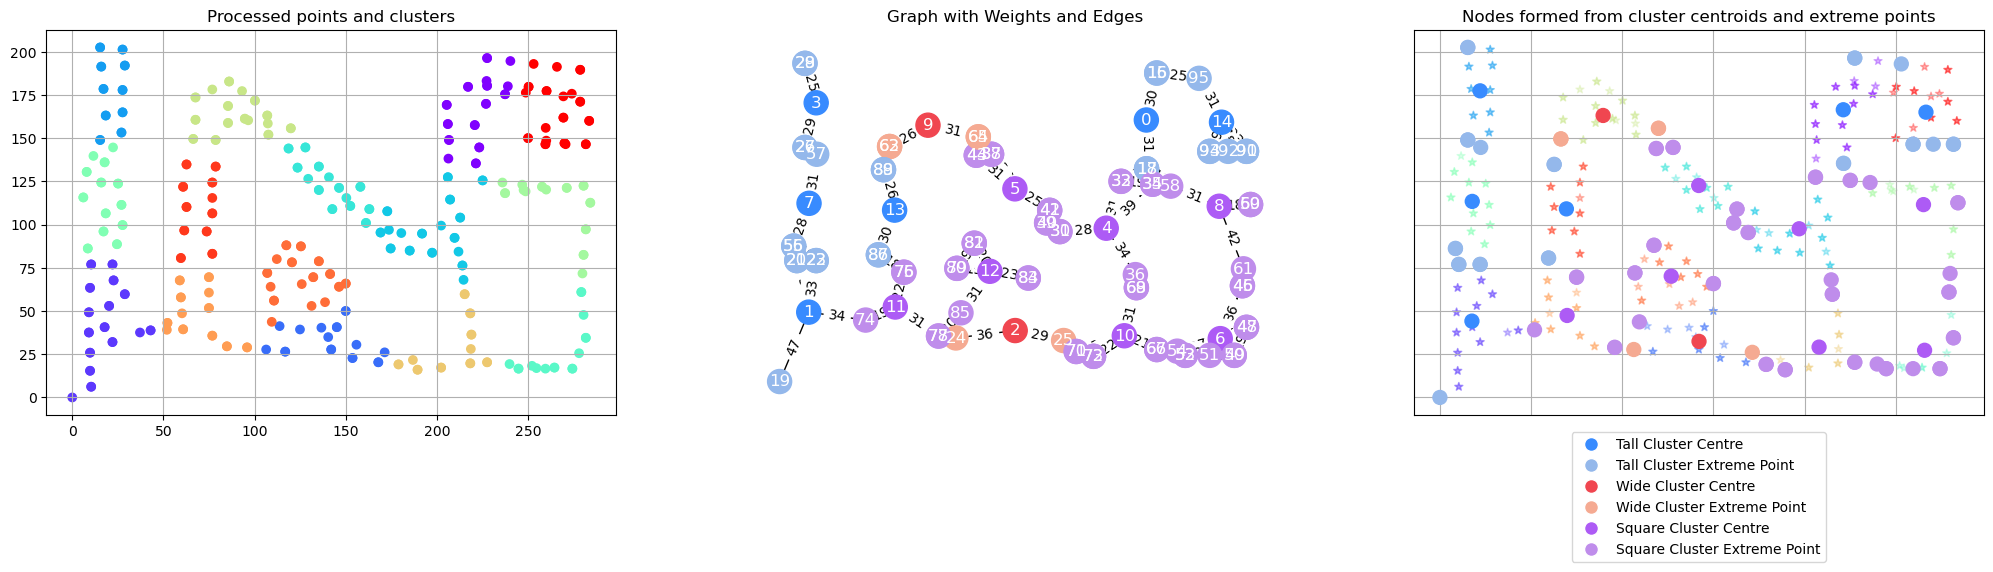

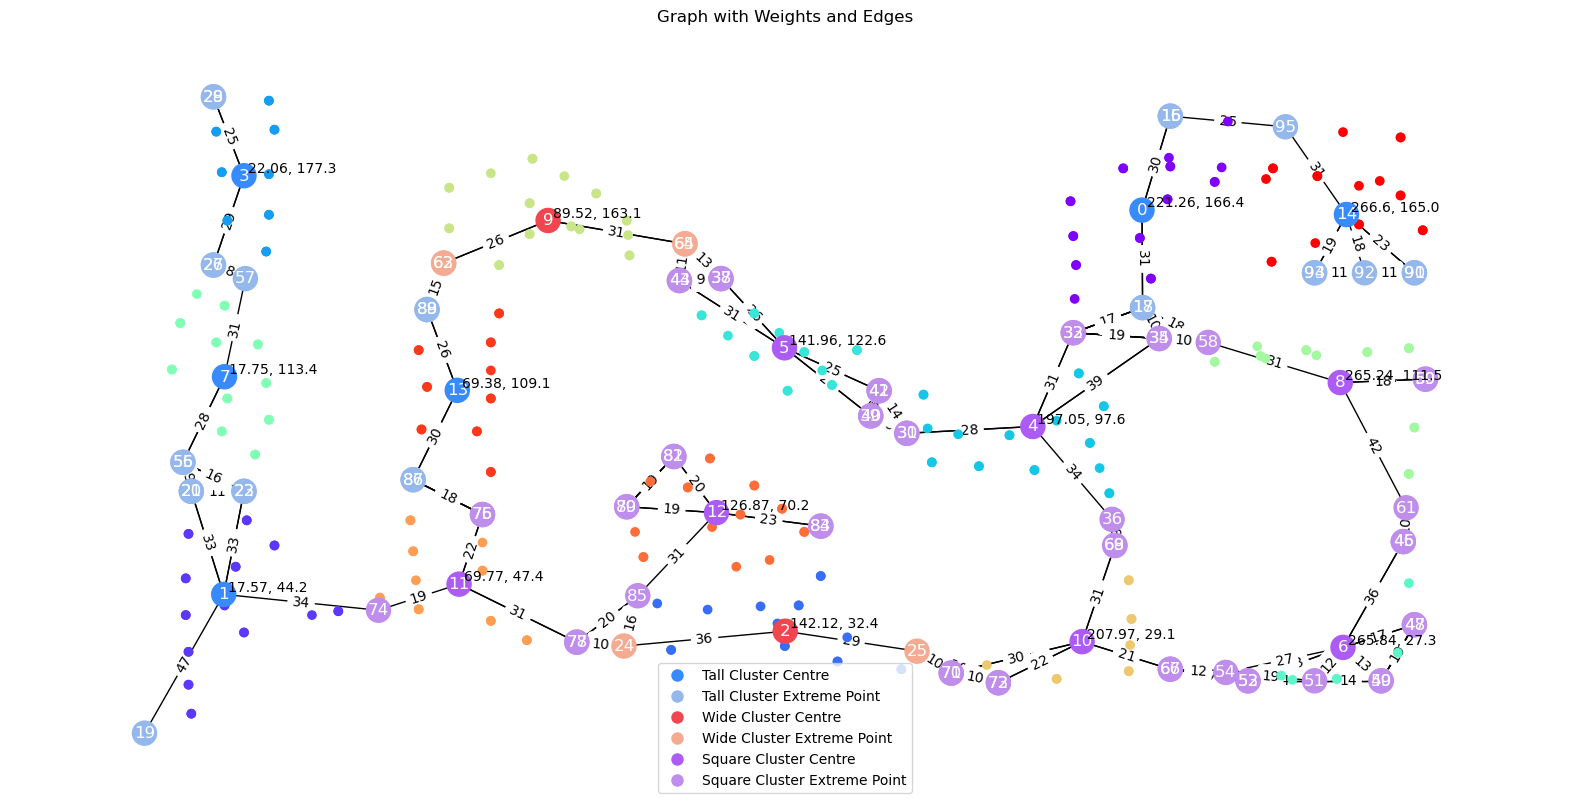

In [16]:
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = np.array(points)
blue = (56/255, 139/255,255/255)
lightblue = (148/255, 184/255,235/255)
red = (240/255, 70/255, 80/255)
lightred = (245/255, 170/255,146/255)
purple = (173/255, 91/255,245/255) 
lightpurple = (191/255, 141/255,235/255)

# Define the number of clusters
n_clusters = 15

# Use KMeans to cluster points
kmeans = KMeans(n_clusters=n_clusters).fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a list of clusters where each cluster is a list of its points
clusters = [data[labels == i] for i in range(n_clusters)]

# Create a graph
G = nx.Graph()

# define a tolerance to determine a tall, wide, or square cluster
tolerance = 1.3

# Add nodes to the graph for centers and extreme points
node_pos = {}  # store positions of all nodes
node_colors = {}  # store colors of all nodes
added_extreme_nodes_counter = len(clusters)
cluster_nodes = {}  # store node indices for each cluster (eligible)
all_cluster_nodes = {}


for i, cluster in enumerate(clusters):
    # center node
    G.add_node(i)
    node_pos[i] = centers[i]
    cluster_nodes[i] = [i]  # start a new entry in cluster_nodes with the center node
    all_cluster_nodes[i] = list(cluster)

    # print(f"Node {i} position: {node_pos[i]}") 


    # Find the extreme points
    min_x, min_y = np.min(cluster, axis=0)
    max_x, max_y = np.max(cluster, axis=0)

    # Determine the "shape" of the cluster
    if (max_y - min_y) > tolerance*(max_x - min_x):  # tall cluster
        extreme_points = cluster[np.logical_or(cluster[:, 1] == min_y, cluster[:, 1] == max_y)]
        node_colors[i] = blue  # center of tall cluster
        extreme_nodes_color = lightblue
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)         
            
            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])
    elif (max_x - min_x) > tolerance*(max_y - min_y):  # wide cluster
        extreme_points = cluster[np.logical_or(cluster[:, 0] == min_x, cluster[:, 0] == max_x)]
        node_colors[i] = red # center of wide cluster
        extreme_nodes_color = lightred
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


    else: #square cluster
        extreme_points = cluster[np.logical_or.reduce((cluster[:, 0] == min_x, cluster[:, 0] == max_x,
                                                      cluster[:, 1] == min_y, cluster[:, 1] == max_y))]
        node_colors[i] = purple  # center of square cluster
        extreme_nodes_color = lightpurple
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


# Define a distance threshold for adjacency
inter_cluster_threshold_any = 20 # distances between any two nodes in different clusters
intra_cluster_threshold = 18 # distances between any two nodes in the same cluster
inter_cluster_threshold = 22 # distances between center/extreme nodes in different clusters


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)
        
        # Get indices of distances that are less than the threshold
        close_indices = np.where(distances < inter_cluster_threshold)
        
        # If there are any distances less than the threshold
        if close_indices[0].size > 0:
            for k in range(close_indices[0].size):
                # print(f"nodes {cluster_nodes[i][close_indices[0][k]]} from cluster {i} and {cluster_nodes[j][close_indices[1][k]]} from cluster {j} are close enough to be adjacent with distance {distances[close_indices[0][k], close_indices[1][k]]}")
                
                # If the nodes are not from the same cluster, add an edge between these nodes
                if i != j:
                    G.add_edge(cluster_nodes[i][close_indices[0][k]], cluster_nodes[j][close_indices[1][k]], weight=distances[close_indices[0][k], close_indices[1][k]])
                    # print(f"added edge between {cluster_nodes[i][close_indices[0][k]]} and {cluster_nodes[j][close_indices[1][k]]}")
        # else:
            # print(f"clusters {i} and {j} are not close enough to be adjacent")


# Compute the pairwise distances using cdist
extreme_points_indices = list(range(n_clusters, added_extreme_nodes_counter))
distances = cdist([node_pos[i] for i in extreme_points_indices], [node_pos[i] for i in extreme_points_indices])

# For each pair of nodes
for i in range(len(extreme_points_indices)):
    for j in range(i+1, len(extreme_points_indices)):  # avoid duplicate comparisons and self-comparisons
        # If the distance is less than the threshold, add an edge
        if distances[i, j] < inter_cluster_threshold:
            G.add_edge(extreme_points_indices[i], extreme_points_indices[j], weight=distances[i, j])
            # print(f"added edge between {extreme_points_indices[i]} and {extreme_points_indices[j]}")


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances_eligible = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)

        all_node_pos_cluster_i = all_cluster_nodes[i]
        all_node_pos_cluster_j = all_cluster_nodes[j]
        distances_all = cdist(all_node_pos_cluster_i, all_node_pos_cluster_j)

        
        # If the minimum distance is less than the threshold
        if np.min(distances_eligible) < inter_cluster_threshold or np.min(distances_all) < inter_cluster_threshold_any:
            # get the nodes of minimum distance
            min_dist_indices = np.unravel_index(np.argmin(distances_eligible), distances_eligible.shape)
            # print(f"clusters {i} and {j} are close enough to be adjacent with distances {np.min(distances)} between nodes {cluster_nodes[i][min_dist_indices[0]]} and {cluster_nodes[j][min_dist_indices[1]]}")
            # Find the pair of nodes with the minimum distance
            min_dist_indices = np.unravel_index(np.argmin(distances_eligible), distances_eligible.shape)
            min_dist_node_i = cluster_nodes[i][min_dist_indices[0]]
            min_dist_node_j = cluster_nodes[j][min_dist_indices[1]]
            
            # Add an edge between these nodes
            # G.add_edge(min_dist_node_i, min_dist_node_j, weight=np.min(distances))
            # If the nodes are not from the same cluster, add an edge between these nodes
            if i != j:
                G.add_edge(min_dist_node_i, min_dist_node_j, weight=np.min(distances_eligible))
                # print(f"added edge between {min_dist_node_i} and {min_dist_node_j}")
        else:
            min_dist_indices = np.unravel_index(np.argmin(distances_eligible), distances_eligible.shape)
            # print(f"clusters {i} and {j} are not close enough to be adjacent with distances {np.min(distances_eligible)} between nodes {cluster_nodes[i][min_dist_indices[0]]} and {cluster_nodes[j][min_dist_indices[1]]}")
            
# remove self loops
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)



# PLOT
fig, axs = plt.subplots(1, 3, figsize=(25, 5));

axs[0].set_title('Processed points and clusters')
axs[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)

axs[1].set_title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, ax=axs[1], font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels, ax=axs[1]);


axs[2].set_title('Nodes formed from cluster centroids and extreme points')
axs[2].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.3, marker = '*')
nx.draw_networkx_nodes(G, node_pos, node_color=list(node_colors.values()), ax=axs[2], node_size=100)
# set legend for axs[1]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tall Cluster Centre', markerfacecolor=blue, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Tall Cluster Extreme Point', markerfacecolor=lightblue, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Centre', markerfacecolor=red, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Extreme Point', markerfacecolor=lightred, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Centre', markerfacecolor=purple, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Extreme Point', markerfacecolor=lightpurple, markersize=10)]
axs[2].legend( handles = legend_elements,loc="lower center", bbox_to_anchor=(0.5, -0.4, 0, 0)) # add legend to axs[1]


for ax in axs:
    ax.grid(True, which='both')
    # show axis numbers
    
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels);
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)
# show axis numbers and ticks




# # Print nodes that are connected with each other
# for edge in G.edges:
#     node_1, node_2 = edge
#     if ((node_1 in cluster_nodes[0] and node_2 in cluster_nodes[1]) or 
#        (node_1 in cluster_nodes[1] and node_2 in cluster_nodes[0])):
#         # print(f"Nodes {node_1} and {node_2} are connected")

for i, center in enumerate(centers):
    plt.text(center[0]+1, center[1]+1, str(f"{round(center[0], 2)}, {round(center[1], 1)}"), fontsize=10)
# for i, extreme_point in enumerate(extreme_points):
#     plt.text(extreme_point[0]+5, extreme_point[1]+5, str(f"{round(extreme_point[0], 2)}, {round(extreme_point[1], 1)}"), fontsize=10, color='darkgray')

plt.legend(handles = legend_elements,loc="lower center")
plt.show()

#### Get Outputs (For A* Search)

In [17]:
# Initialize new dictionary to store positions
dod = nx.to_dict_of_dicts(G)

graph_dict = {}

# # Modifying dod to include edge weight and positions
for node in dod:
    node_pos_tuple = tuple(node_pos[node])  # Get position tuple from node_pos dictionary
    graph_dict[node_pos_tuple] = {}
    for neighbor in dod[node]:
        neighbor_pos_tuple = tuple(node_pos[neighbor])  # Get position tuple from node_pos dictionary
        graph_dict[node_pos_tuple][neighbor_pos_tuple] = round(dod[node][neighbor]['weight'],2)  # assigning the weight value


print(graph_dict)


{(221.25644230769228, 166.40663461538463): {(227.54, 196.3): 30.55, (221.39, 135.39): 31.02}, (227.54, 196.3): {(221.25644230769228, 166.40663461538463): 30.55, (227.54, 196.3): 0.0}, (221.39, 135.39): {(221.25644230769228, 166.40663461538463): 31.02, (206.01, 127.39): 17.34, (225.08, 125.55): 10.51, (235.95000000000005, 124.32): 18.29, (221.39, 135.39): 0.0}, (17.567999999999955, 44.155166666666666): {(0.0, 0.0): 47.52, (10.38, 76.95): 33.57, (22.07, 76.95): 33.1, (51.9, 39.11): 34.7}, (0.0, 0.0): {(17.567999999999955, 44.155166666666666): 47.52}, (10.38, 76.95): {(17.567999999999955, 44.155166666666666): 33.57, (8.53, 86.18): 9.41, (10.38, 76.95): 0.0, (22.07, 76.95): 11.69}, (22.07, 76.95): {(17.567999999999955, 44.155166666666666): 33.1, (8.53, 86.18): 16.39, (10.38, 76.95): 11.69, (22.07, 76.95): 0.0}, (142.12241228070175, 32.43355263157896): {(106.35, 27.73): 36.08, (171.35333333333335, 26.089999999999996): 29.91}, (106.35, 27.73): {(142.12241228070175, 32.43355263157896): 36.08,

[(0.0, 0.0), (8.056000000000012, 8.652000000000015), (9.76, 25.89), (14.685000000000016, 34.037499999999994), (37.14, 37.575), (56.183461538461515, 45.16884615384613), (76.82, 35.73), (85.84333333333333, 31.423333333333346), (106.35, 27.73), (114.67138888888888, 34.17416666666668), (124.90333333333334, 39.31999999999999), (146.78401515151515, 35.28477272727274), (153.72, 22.81), (167.87, 20.35), (178.82625000000002, 19.848749999999995), (202.32, 17.27), (216.98277777777776, 23.935000000000016), (218.32, 48.65), (216.349, 56.953), (214.01, 76.33), (205.72535714285715, 93.93107142857143), (207.24, 114.47), (217.52888888888887, 133.78444444444443), (223.24, 144.62), (209.705, 158.4625), (226.93, 169.84), (248.76999999999998, 176.305), (262.6547727272727, 182.10750000000002), (278.61, 189.53)]


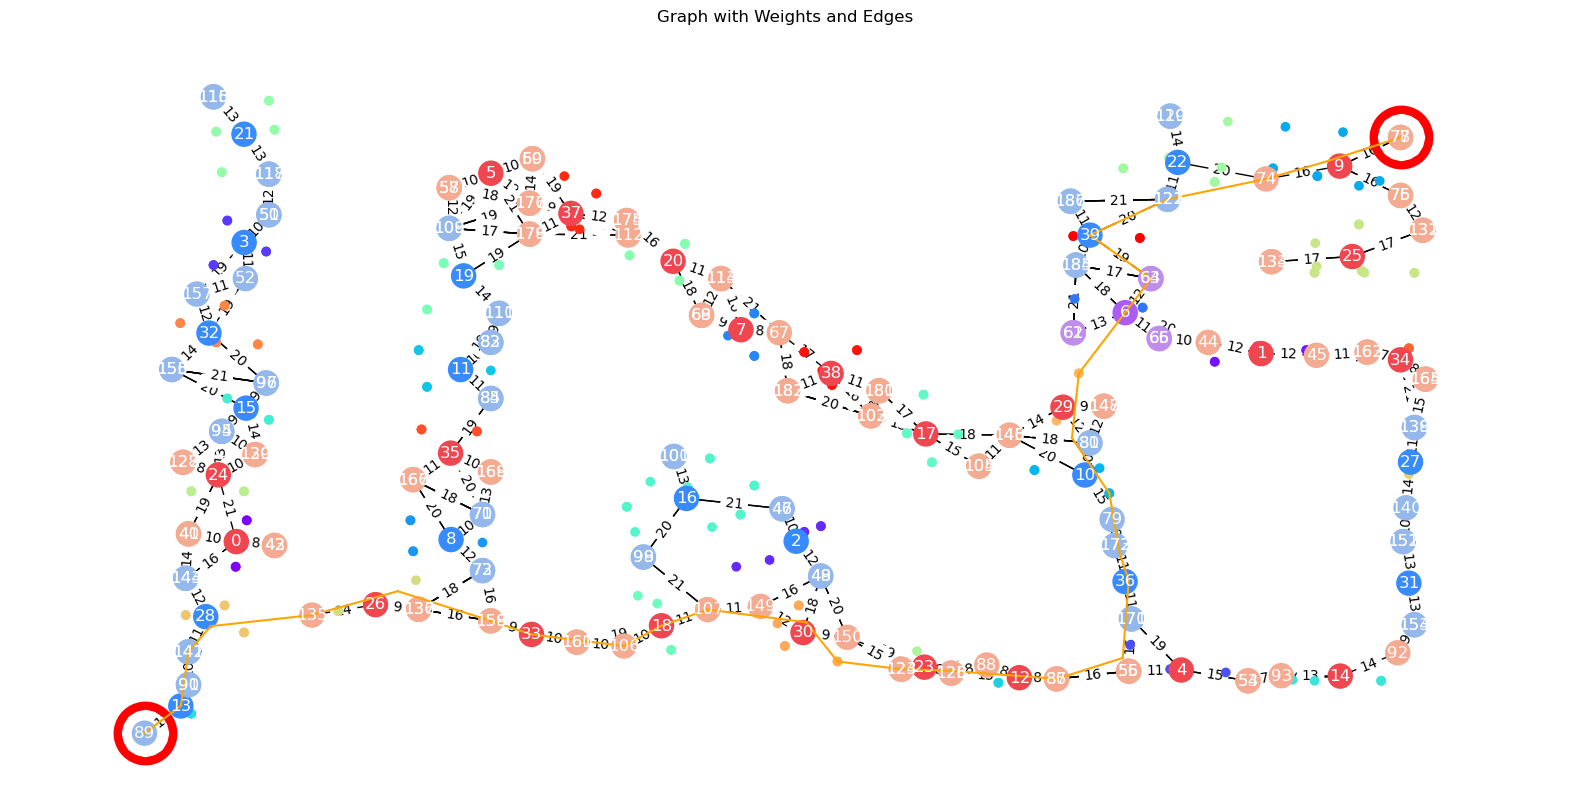

In [38]:
import heapq
import math

def heuristic(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def a_star(graph, initial_node, detination_node):
    queue = []
    heapq.heappush(queue, (0, initial_node))
    costs = {initial_node: 0}
    came_from = {initial_node: None}
    
    while queue:
        cost, node = heapq.heappop(queue)
        
        if node == detination_node:
            path = []
            while node is not None:
                path.append(node)
                node = came_from[node]
            path.reverse()
            return path
        
        for neighbour, edge_cost in graph[node].items():
            new_cost = cost + edge_cost
            if neighbour not in costs or new_cost < costs[neighbour]:
                costs[neighbour] = new_cost
                priority = new_cost + heuristic(neighbour, detination_node)
                heapq.heappush(queue, (priority, neighbour))
                came_from[neighbour] = node
                
    return None


# find the nodes closest to the origin and closest to 300,200
origin = (0,0)
destination = (300,200)

closest_origin_node = min(graph_dict.keys(), key=lambda node: heuristic(node, origin))
closest_destination_node = min(graph_dict.keys(), key=lambda node: heuristic(node, destination))

graph = {
 (68.82, 105.67): {(67.56, 75.32): 6.64, (69.78, 133.86): 5.92},
 (264.53, 148.47): {(277.15, 168.88): 6.83, (249.18, 180.61): 21.31},
 (180.75, 90.4): {(161.96, 108.66): 4.87, (207.64, 84.59): 6.19},
 (80.61, 37.11): {(67.56, 75.32): 8.92, (108.44, 33.64): 5.54, (51.56, 43.19): 15.08},
 (21.96, 194.69): {(23.02, 166.08): 6.48},
 (217.58, 48.28): {(207.64, 84.59): 8.33, (214.27, 20.35): 8.31},
 (123.88, 142.94): {(101.19, 163.73): 6.83, (141.65, 118.74): 8.28},
 (132.64, 53.52): {(148.69, 32.05): 5.28, (118.82, 79.38): 8.21, (142.85, 68.37): 7.94, (108.44, 33.64): 12.36},
 (18.58, 91.27): {(18.74, 65.15): 4.71, (19.5, 111.3): 5.27},
 (18.74, 65.15): {(18.58, 91.27): 4.71, (13.93, 38.19): 6.27},
 (7.53, 9.37): {(13.93, 38.19): 5.23},
 (210.74, 161.15): {(226.58, 180.65): 6.88, (220.51, 137.9): 6.58, (208.53, 115.21): 21.55},
 (77.24, 164.64): {(101.19, 163.73): 8.98, (69.78, 133.86): 5.57},
 (247.66, 120.69): {(279.79, 113.99): 13.54, (220.51, 137.9): 14.35},
 (23.02, 166.08): {(21.96, 194.69): 6.48, (16.04, 132.5): 7.24},
 (278.6, 31.12): {(280.14, 76.25): 13.28, (253.88, 17.27): 9.86},
 (148.69, 32.05): {(132.64, 53.52): 5.28, (142.85, 68.37): 12.85, (175.76, 19.07): 7.18},
 (118.82, 79.38): {(132.64, 53.52): 8.21, (142.85, 68.37): 6.54, (108.44, 33.64): 20.31},
 (161.96, 108.66): {(180.75, 90.4): 4.87, (141.65, 118.74): 5.1},
 (280.14, 76.25): {(278.6, 31.12): 13.28, (279.79, 113.99): 7.41},
 (226.58, 180.65): {(210.74, 161.15): 6.88, (220.51, 137.9): 19.39, (249.18, 180.61): 4.86},
 (207.64, 84.59): {(180.75, 90.4): 6.19, (217.58, 48.28): 8.33, (208.53, 115.21): 11.43},
 (13.93, 38.19): {(18.74, 65.15): 6.27, (7.53, 9.37): 5.23, (51.56, 43.19): 16.05},
 (279.79, 113.99): {(247.66, 120.69): 13.54, (280.14, 76.25): 7.41},
 (67.56, 75.32): {(68.82, 105.67): 6.64, (80.61, 37.11): 8.92, (51.56, 43.19): 4.93},
 (142.85, 68.37): {(132.64, 53.52): 7.94, (148.69, 32.05): 12.85, (118.82, 79.38): 6.54},
 (16.04, 132.5): {(23.02, 166.08): 7.24, (19.5, 111.3): 6.22},
 (277.15, 168.88): {(264.53, 148.47): 6.83, (249.18, 180.61): 9.73},
 (253.88, 17.27): {(278.6, 31.12): 9.86, (214.27, 20.35): 17.62},
 (101.19, 163.73): {(123.88, 142.94): 6.83, (77.24, 164.64): 8.98},
 (108.44, 33.64): {(80.61, 37.11): 5.54, (132.64, 53.52): 12.36, (118.82, 79.38): 20.31},
 (220.51, 137.9): {(210.74, 161.15): 6.58, (247.66, 120.69): 14.35, (226.58, 180.65): 19.39, (208.53, 115.21): 10.77},
 (214.27, 20.35): {(217.58, 48.28): 8.31, (253.88, 17.27): 17.62, (175.76, 19.07): 6.49},
 (51.56, 43.19): {(80.61, 37.11): 15.08, (13.93, 38.19): 16.05, (67.56, 75.32): 4.93},
 (208.53, 115.21): {(210.74, 161.15): 21.55, (207.64, 84.59): 11.43, (220.51, 137.9): 10.77},
 (175.76, 19.07): {(148.69, 32.05): 7.18, (214.27, 20.35): 6.49},
 (69.78, 133.86): {(68.82, 105.67): 5.92, (77.24, 164.64): 5.57},
 (141.65, 118.74): {(123.88, 142.94): 8.28, (161.96, 108.66): 5.1},
 (249.18, 180.61): {(264.53, 148.47): 21.31, (226.58, 180.65): 4.86, (277.15, 168.88): 9.73},
 (19.5, 111.3): {(18.58, 91.27): 5.27, (16.04, 132.5): 6.22}
 }
shortestPath = a_star(graph_dict,closest_origin_node , closest_destination_node)
print(a_star(graph_dict,closest_origin_node , closest_destination_node))
# plot the graph
plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels);
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)
# show axis numbers and ticks


plt.scatter(closest_origin_node[0], closest_origin_node[1], color='red', linewidths=40)
plt.scatter(closest_destination_node[0], closest_destination_node[1], color='red', linewidths=40)
# plot the shortest path
for i in range(len(shortestPath) - 1):
    plt.plot((shortestPath[i][0], shortestPath[i + 1][0]), (shortestPath[i][1], shortestPath[i + 1][1]), color='orange')

plt.show()


## Increased Clusters and Interconnections

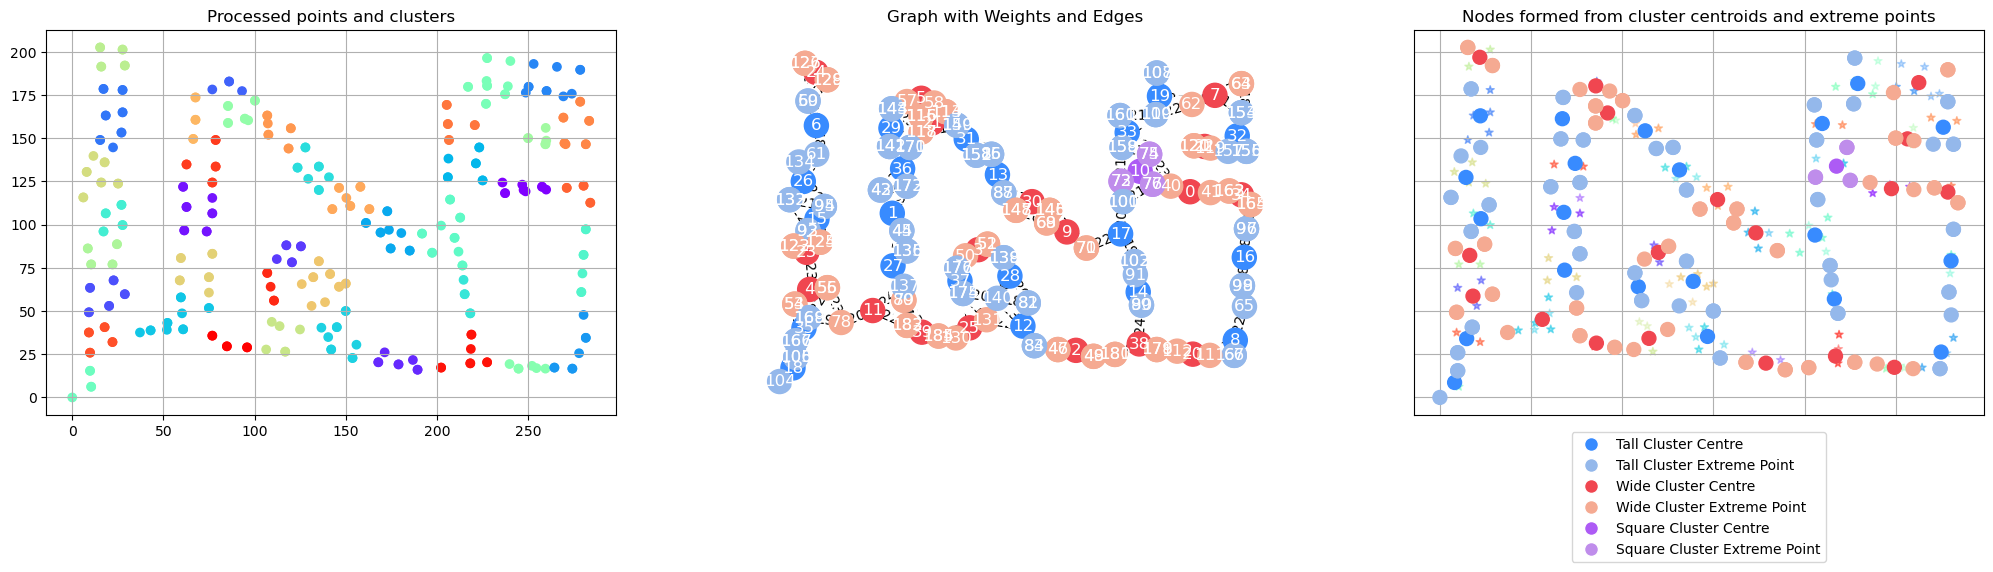

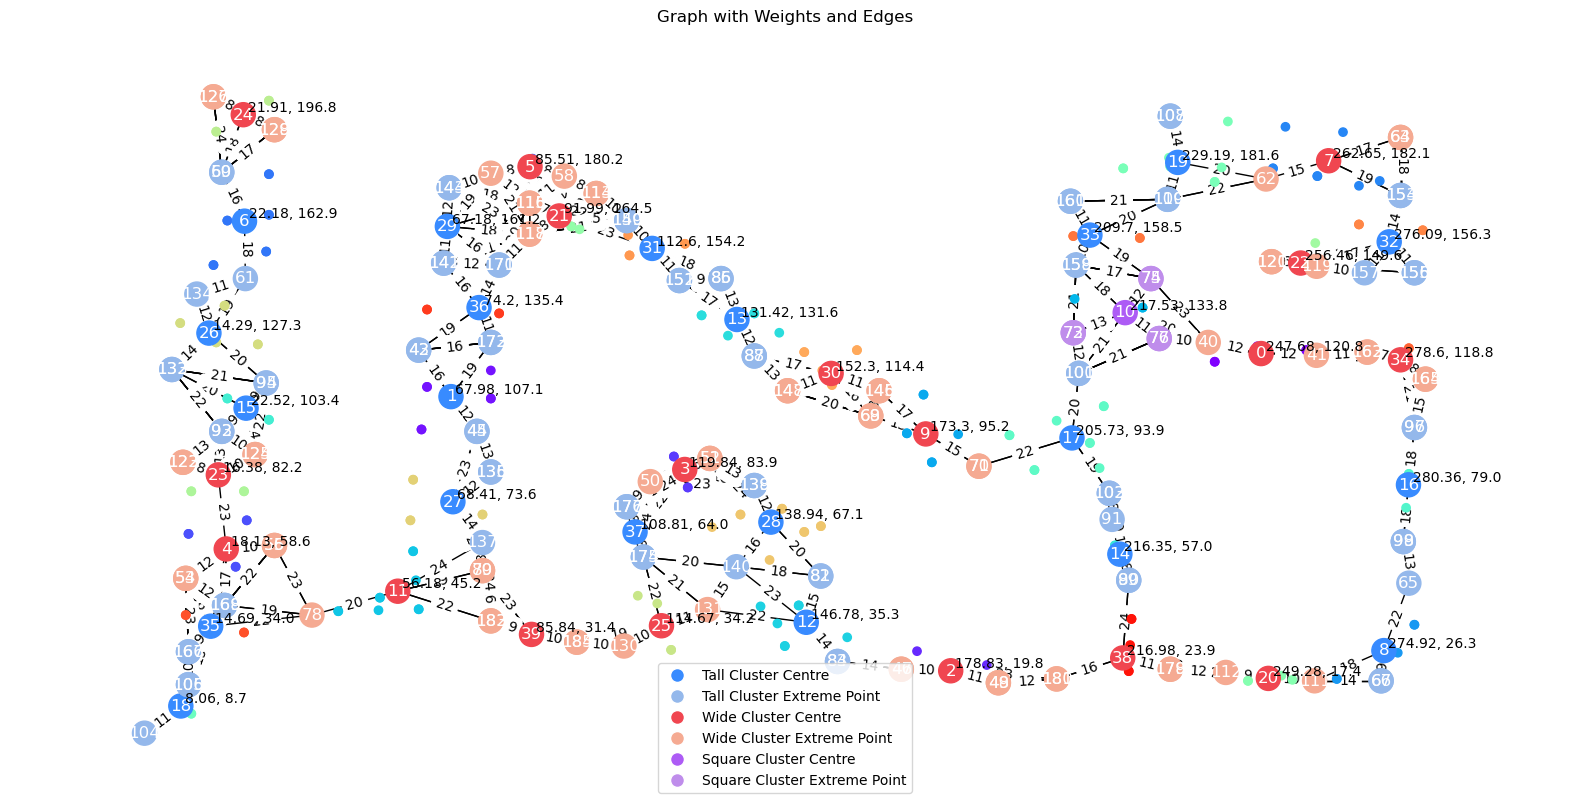

In [18]:
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = np.array(points)
blue = (56/255, 139/255,255/255)
lightblue = (148/255, 184/255,235/255)
red = (240/255, 70/255, 80/255)
lightred = (245/255, 170/255,146/255)
purple = (173/255, 91/255,245/255) 
lightpurple = (191/255, 141/255,235/255)

# Define the number of clusters
n_clusters = 40

# Use KMeans to cluster points
kmeans = KMeans(n_clusters=n_clusters).fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a list of clusters where each cluster is a list of its points
clusters = [data[labels == i] for i in range(n_clusters)]

# Create a graph
G = nx.Graph()

# define a tolerance to determine a tall, wide, or square cluster
tolerance = 1.05

# Add nodes to the graph for centers and extreme points
node_pos = {}  # store positions of all nodes
node_colors = {}  # store colors of all nodes
added_extreme_nodes_counter = len(clusters)
cluster_nodes = {}  # store node indices for each cluster (eligible)
all_cluster_nodes = {}


for i, cluster in enumerate(clusters):
    # center node
    G.add_node(i)
    node_pos[i] = centers[i]
    cluster_nodes[i] = [i]  # start a new entry in cluster_nodes with the center node
    all_cluster_nodes[i] = list(cluster)

    # print(f"Node {i} position: {node_pos[i]}") 


    # Find the extreme points
    min_x, min_y = np.min(cluster, axis=0)
    max_x, max_y = np.max(cluster, axis=0)

    # Determine the "shape" of the cluster
    if (max_y - min_y) > tolerance*(max_x - min_x):  # tall cluster
        extreme_points = cluster[np.logical_or(cluster[:, 1] == min_y, cluster[:, 1] == max_y)]
        node_colors[i] = blue  # center of tall cluster
        extreme_nodes_color = lightblue
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)         
            
            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])
    elif (max_x - min_x) > tolerance*(max_y - min_y):  # wide cluster
        extreme_points = cluster[np.logical_or(cluster[:, 0] == min_x, cluster[:, 0] == max_x)]
        node_colors[i] = red # center of wide cluster
        extreme_nodes_color = lightred
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


    else: #square cluster
        extreme_points = cluster[np.logical_or.reduce((cluster[:, 0] == min_x, cluster[:, 0] == max_x,
                                                      cluster[:, 1] == min_y, cluster[:, 1] == max_y))]
        node_colors[i] = purple  # center of square cluster
        extreme_nodes_color = lightpurple
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


# Define a distance threshold for adjacency
inter_cluster_threshold_any = 25 # distances between any two nodes in different clusters
intra_cluster_threshold = 18 # distances between any two nodes in the same cluster
inter_cluster_threshold = 25 # distances between center/extreme nodes in different clusters


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)
        
        # Get indices of distances that are less than the threshold
        close_indices = np.where(distances < inter_cluster_threshold)
        
        # If there are any distances less than the threshold
        if close_indices[0].size > 0:
            for k in range(close_indices[0].size):
                # print(f"nodes {cluster_nodes[i][close_indices[0][k]]} from cluster {i} and {cluster_nodes[j][close_indices[1][k]]} from cluster {j} are close enough to be adjacent with distance {distances[close_indices[0][k], close_indices[1][k]]}")
                
                # If the nodes are not from the same cluster, add an edge between these nodes
                if i != j:
                    G.add_edge(cluster_nodes[i][close_indices[0][k]], cluster_nodes[j][close_indices[1][k]], weight=distances[close_indices[0][k], close_indices[1][k]])
                    # print(f"added edge between {cluster_nodes[i][close_indices[0][k]]} and {cluster_nodes[j][close_indices[1][k]]}")
        # else:
            # print(f"clusters {i} and {j} are not close enough to be adjacent")


# Compute the pairwise distances using cdist
extreme_points_indices = list(range(n_clusters, added_extreme_nodes_counter))
distances = cdist([node_pos[i] for i in extreme_points_indices], [node_pos[i] for i in extreme_points_indices])

# # For each pair of nodes
# for i in range(len(extreme_points_indices)):
#     for j in range(i+1, len(extreme_points_indices)):  # avoid duplicate comparisons and self-comparisons
#         # If the distance is less than the threshold, add an edge
#         if distances[i, j] < inter_cluster_threshold:
#             G.add_edge(extreme_points_indices[i], extreme_points_indices[j], weight=distances[i, j])
#             print(f"added edge between {extreme_points_indices[i]} and {extreme_points_indices[j]}")


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances_eligible = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)

        all_node_pos_cluster_i = all_cluster_nodes[i]
        all_node_pos_cluster_j = all_cluster_nodes[j]
        distances_all = cdist(all_node_pos_cluster_i, all_node_pos_cluster_j)

        
        # If the minimum distance is less than the threshold
        # if np.min(distances_eligible) < inter_cluster_threshold or np.min(distances_all) < inter_cluster_threshold_any:
            # If the nodes are not from the same cluster, add an edge between these nodes' centers

            # if i != j:
                # measure distance between center[i] and center[j]
                # G.add_edge(i, j, weight=np.linalg.norm(centers[i] - centers[j]))
                # print(f"added edge between {min_dist_node_i} and {min_dist_node_j}")

# remove self loops
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)



# PLOT
fig, axs = plt.subplots(1, 3, figsize=(25, 5));

axs[0].set_title('Processed points and clusters')
axs[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)

axs[1].set_title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, ax=axs[1], font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels, ax=axs[1]);


axs[2].set_title('Nodes formed from cluster centroids and extreme points')
axs[2].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.3, marker = '*')
nx.draw_networkx_nodes(G, node_pos, node_color=list(node_colors.values()), ax=axs[2], node_size=100)
# set legend for axs[1]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tall Cluster Centre', markerfacecolor=blue, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Tall Cluster Extreme Point', markerfacecolor=lightblue, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Centre', markerfacecolor=red, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Extreme Point', markerfacecolor=lightred, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Centre', markerfacecolor=purple, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Extreme Point', markerfacecolor=lightpurple, markersize=10)]
axs[2].legend( handles = legend_elements,loc="lower center", bbox_to_anchor=(0.5, -0.4, 0, 0)) # add legend to axs[1]


for ax in axs:
    ax.grid(True, which='both')
    # show axis numbers
    
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels);
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)
# show axis numbers and ticks




# Print nodes that are connected with each other
# for edge in G.edges:
#     node_1, node_2 = edge
#     if ((node_1 in cluster_nodes[0] and node_2 in cluster_nodes[1]) or 
#        (node_1 in cluster_nodes[1] and node_2 in cluster_nodes[0])):
#         print(f"Nodes {node_1} and {node_2} are connected")

for i, center in enumerate(centers):
    plt.text(center[0]+1, center[1]+1, str(f"{round(center[0], 2)}, {round(center[1], 1)}"), fontsize=10)
# for i, extreme_point in enumerate(extreme_points):
#     plt.text(extreme_point[0]+5, extreme_point[1]+5, str(f"{round(extreme_point[0], 2)}, {round(extreme_point[1], 1)}"), fontsize=10, color='darkgray')

plt.legend(handles = legend_elements,loc="lower center")
plt.show()

## FOR WEBSITE OUTPUT

In [19]:
dod = nx.to_dict_of_dicts(G)

graph_dict = {}

# # Modifying dod to include edge weight and positions
for node in dod:
    node_pos_tuple = tuple(node_pos[node])  # Get position tuple from node_pos dictionary
    graph_dict[node_pos_tuple] = {}
    for neighbor in dod[node]:
        neighbor_pos_tuple = tuple(node_pos[neighbor])  # Get position tuple from node_pos dictionary
        graph_dict[node_pos_tuple][neighbor_pos_tuple] = round(dod[node][neighbor]['weight'],2)  # assigning the weight value


# print(graph_dict)

import json
# graph_d = {(18.74, 68.95): {(19.23, 95.41): 9.41, (15.67, 42.49): 10.95}, (264.79, 148.27): {(273.06, 173.88): 11.36}, (144.55, 61.07): {(114.67, 34.17): 15.05, (108.81, 64.03): 20.83, (146.07, 32.01): 10.55, (124.97, 79.13): 9.41}, (74.51, 154.46): {(69.1, 124.07): 15.21, (105.19, 160.51): 9.55, (81.01, 175.65): 9.84}, (217.09, 51.06): {(205.73, 93.93): 8.33, (216.43, 20.39): 8.31}, (8.54, 13.58): {(15.67, 42.49): 11.7}, (22.06, 190.56): {(22.1, 156.1): 12.92}, (64.51, 72.64): {(67.38, 54.75): 8.92, (72.2, 95.56): 13.67}, (144.46, 116.47): {(126.68, 137.41): 8.28, (163.72, 109.86): 10.04}, (279.94, 67.72): {(274.12, 23.21): 13.28, (279.37, 113.4): 14.82}, (205.73, 93.93): {(217.09, 51.06): 8.33, (176.48, 90.64): 11.38, (217.53, 133.78): 12.98}, (178.83, 19.85): {(146.07, 32.01): 14.36, (216.43, 20.39): 12.98}, (114.67, 34.17): {(144.55, 61.07): 15.05, (85.84, 31.42): 10.53, (108.81, 64.03): 12.36, (146.07, 32.01): 11.79}, (16.25, 124.84): {(22.1, 156.1): 9.77, (19.23, 95.41): 9.93}, (274.12, 23.21): {(279.94, 67.72): 13.28, (249.28, 17.43): 4.96}, (209.7, 158.46): {(217.53, 133.78): 10.77, (227.24, 177.05): 13.75}, (273.06, 173.88): {(264.79, 148.27): 11.36, (242.1, 186.98): 10.14}, (247.68, 120.77): {(217.53, 133.78): 10.94, (279.37, 113.4): 11.32}, (85.84, 31.42): {(114.67, 34.17): 10.53, (67.38, 54.75): 16.1, (50.13, 39.92): 16.42}, (242.1, 186.98): {(273.06, 173.88): 10.14, (227.24, 177.05): 4.86}, (69.1, 124.07): {(74.51, 154.46): 15.21, (72.2, 95.56): 8.92}, (105.19, 160.51): {(74.51, 154.46): 9.55, (126.68, 137.41): 11.75, (81.01, 175.65): 8.98}, (176.48, 90.64): {(205.73, 93.93): 11.38, (163.72, 109.86): 9.73}, (108.81, 64.03): {(144.55, 61.07): 20.83, (114.67, 34.17): 12.36, (124.97, 79.13): 9.55}, (67.38, 54.75): {(64.51, 72.64): 8.92, (85.84, 31.42): 16.1, (50.13, 39.92): 9.25}, (217.53, 133.78): {(205.73, 93.93): 12.98, (209.7, 158.46): 10.77, (247.68, 120.77): 10.94}, (249.28, 17.43): {(274.12, 23.21): 4.96, (216.43, 20.39): 12.35}, (126.68, 137.41): {(144.46, 116.47): 8.28, (105.19, 160.51): 11.75}, (146.07, 32.01): {(144.55, 61.07): 10.55, (178.83, 19.85): 14.36, (114.67, 34.17): 11.79}, (279.37, 113.4): {(279.94, 67.72): 14.82, (247.68, 120.77): 11.32}, (22.1, 156.1): {(22.06, 190.56): 12.92, (16.25, 124.84): 9.77}, (72.2, 95.56): {(64.51, 72.64): 13.67, (69.1, 124.07): 8.92}, (227.24, 177.05): {(209.7, 158.46): 13.75, (242.1, 186.98): 4.86}, (81.01, 175.65): {(74.51, 154.46): 9.84, (105.19, 160.51): 8.98}, (163.72, 109.86): {(144.46, 116.47): 10.04, (176.48, 90.64): 9.73}, (50.13, 39.92): {(85.84, 31.42): 16.42, (67.38, 54.75): 9.25, (15.67, 42.49): 16.05}, (19.23, 95.41): {(18.74, 68.95): 9.41, (16.25, 124.84): 9.93}, (216.43, 20.39): {(217.09, 51.06): 8.31, (178.83, 19.85): 12.98, (249.28, 17.43): 12.35}, (15.67, 42.49): {(18.74, 68.95): 10.95, (8.54, 13.58): 11.7, (50.13, 39.92): 16.05}, (124.97, 79.13): {(144.55, 61.07): 9.41, (108.81, 64.03): 9.55}}
graph_d = graph_dict

# generate node ids and coordinates
nodes = {id: [coord[0], coord[1]] for id, coord in enumerate(graph_d.keys(), 1)}
coord_to_id = {tuple(coord): id for id, coord in nodes.items()}

# create new graph using ids
new_graph = {id: {coord_to_id[neighbour]: weight for neighbour, weight in neighbours.items()} for id, neighbours in enumerate(graph_d.values(), 1)}

# convert to JSON
nodes_json = json.dumps(nodes, indent=4)
new_graph_json = json.dumps(new_graph, indent=4)

print("let nodes_object2 = ", nodes_json)
print("let graphs_object2 = ", new_graph_json)

let nodes_object2 =  {
    "1": [
        247.67555555555555,
        120.76611111111112
    ],
    "2": [
        235.95000000000005,
        124.32
    ],
    "3": [
        259.9433333333333,
        120.21666666666667
    ],
    "4": [
        67.98181818181818,
        107.06545454545454
    ],
    "5": [
        60.82,
        121.86
    ],
    "6": [
        73.74,
        96.02
    ],
    "7": [
        178.82625000000002,
        19.848749999999995
    ],
    "8": [
        167.87,
        20.35
    ],
    "9": [
        189.4,
        16.04
    ],
    "10": [
        119.83857142857143,
        83.89214285714286
    ],
    "11": [
        112.19,
        80.025
    ],
    "12": [
        125.42,
        87.41
    ],
    "13": [
        18.128,
        58.611999999999995
    ],
    "14": [
        9.15,
        49.26
    ],
    "15": [
        28.83,
        59.72
    ],
    "16": [
        85.51124999999999,
        180.2225
    ],
    "17": [
        76.82,
        178.14499

#### Simplified with min spanning tree

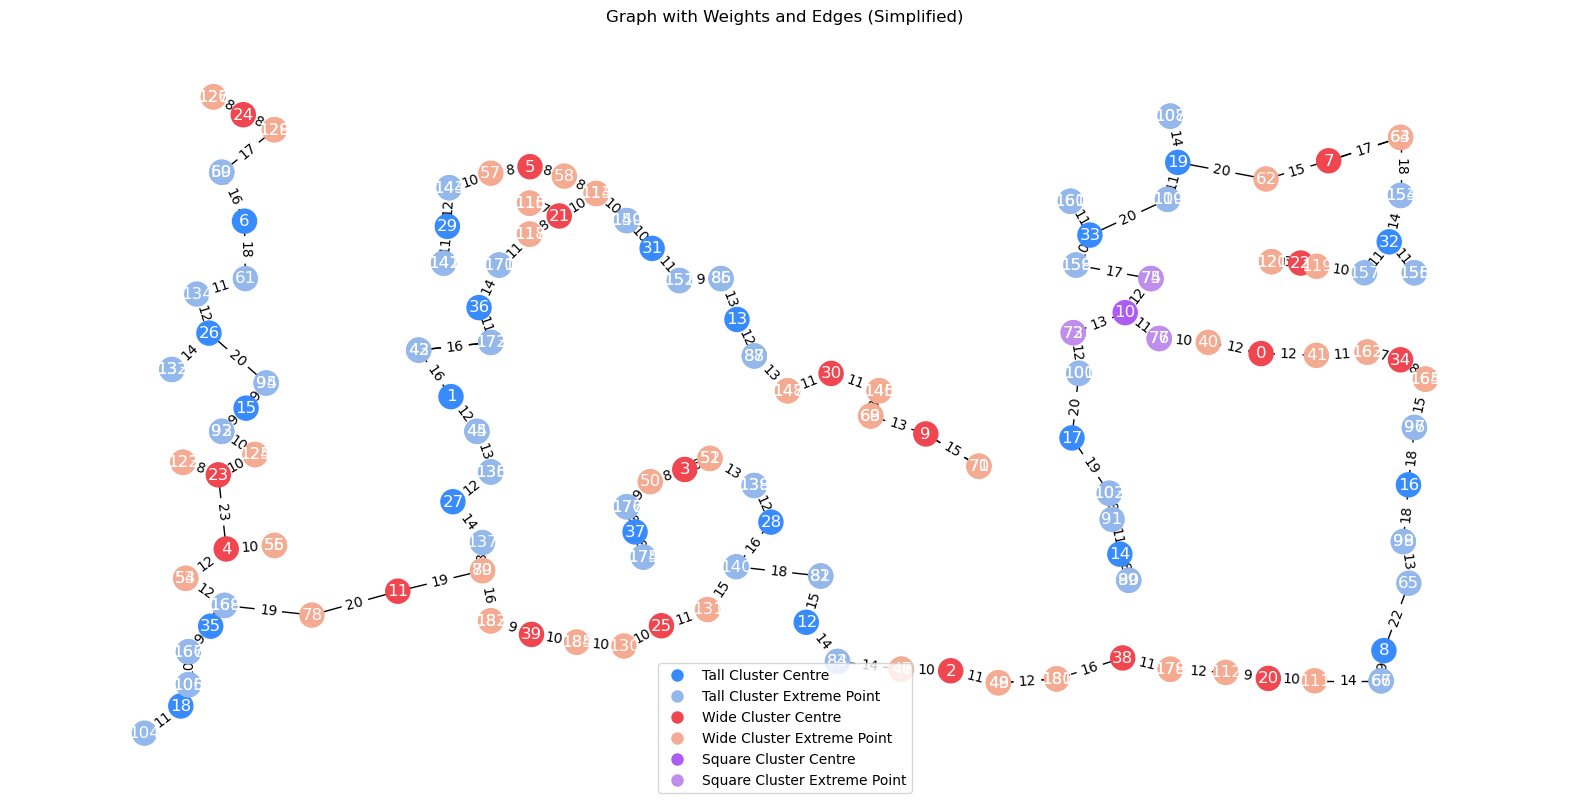

In [20]:
T = nx.minimum_spanning_tree(G, weight='weight')
plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges (Simplified)')
nx.draw(T, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(T, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(T, node_pos, edge_labels=edge_labels);
plt.legend(handles = legend_elements,loc="lower center")
# plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)

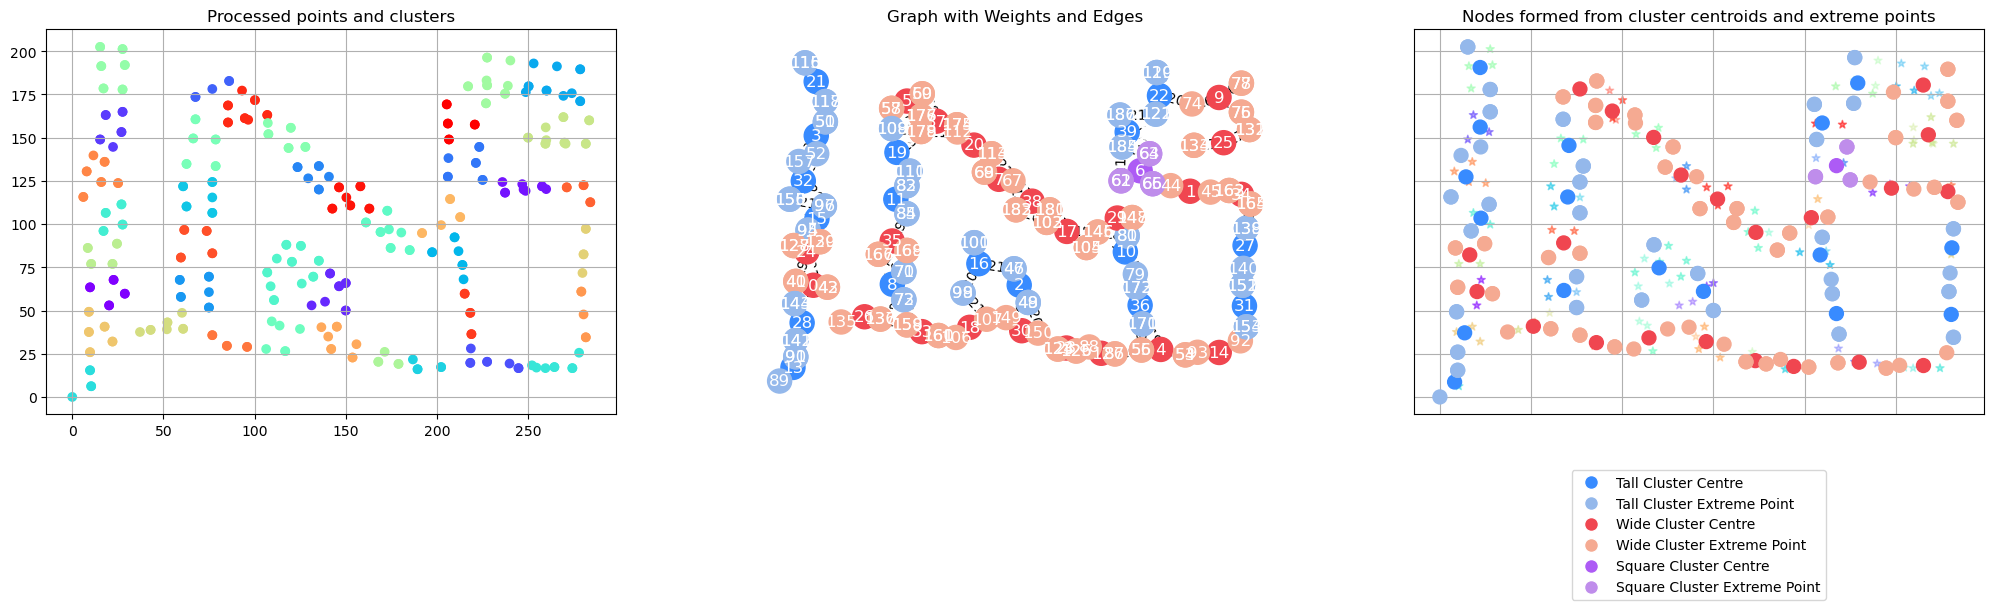

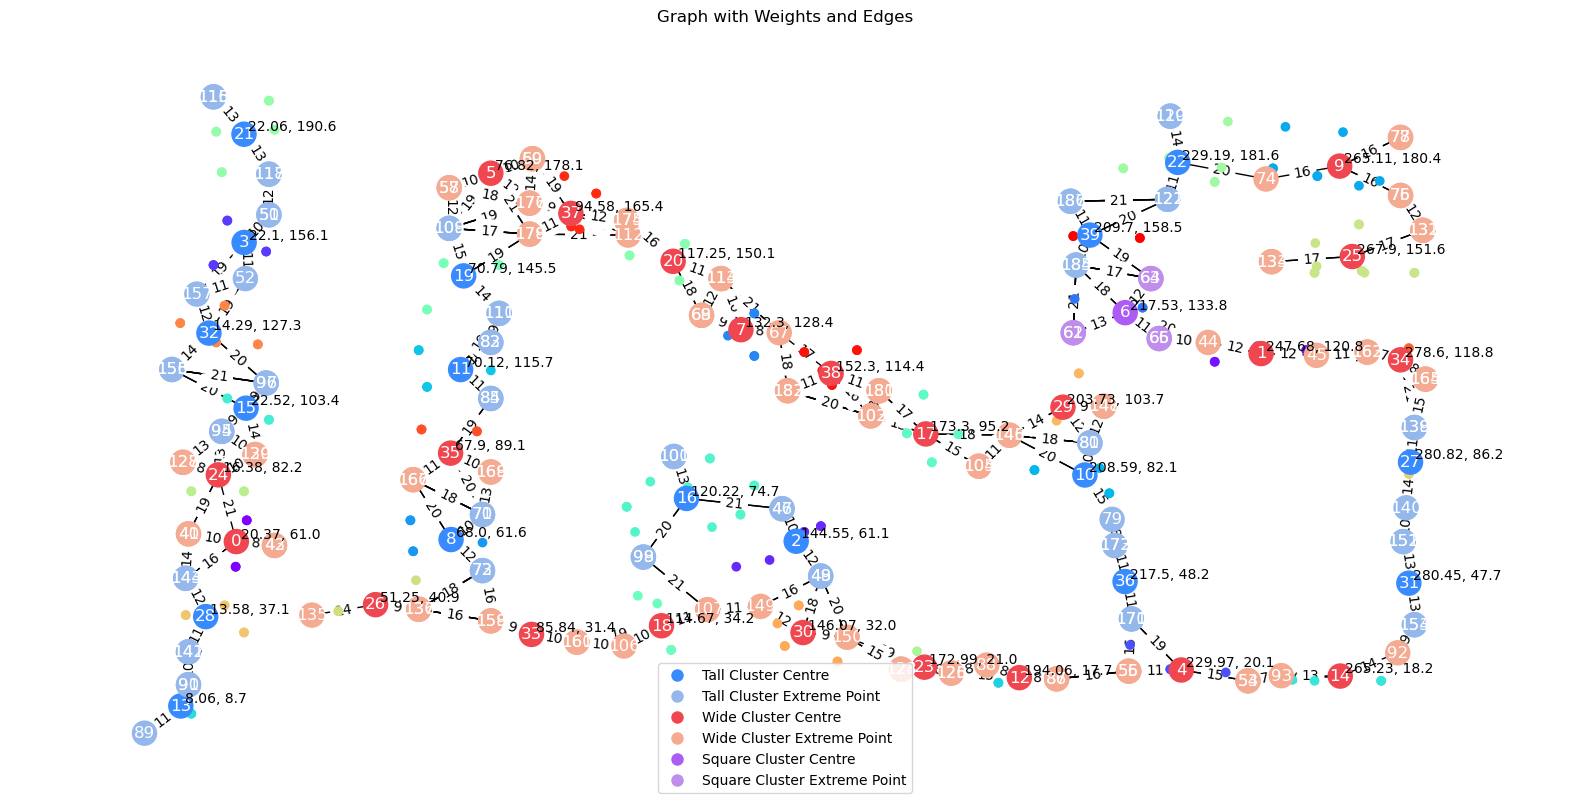

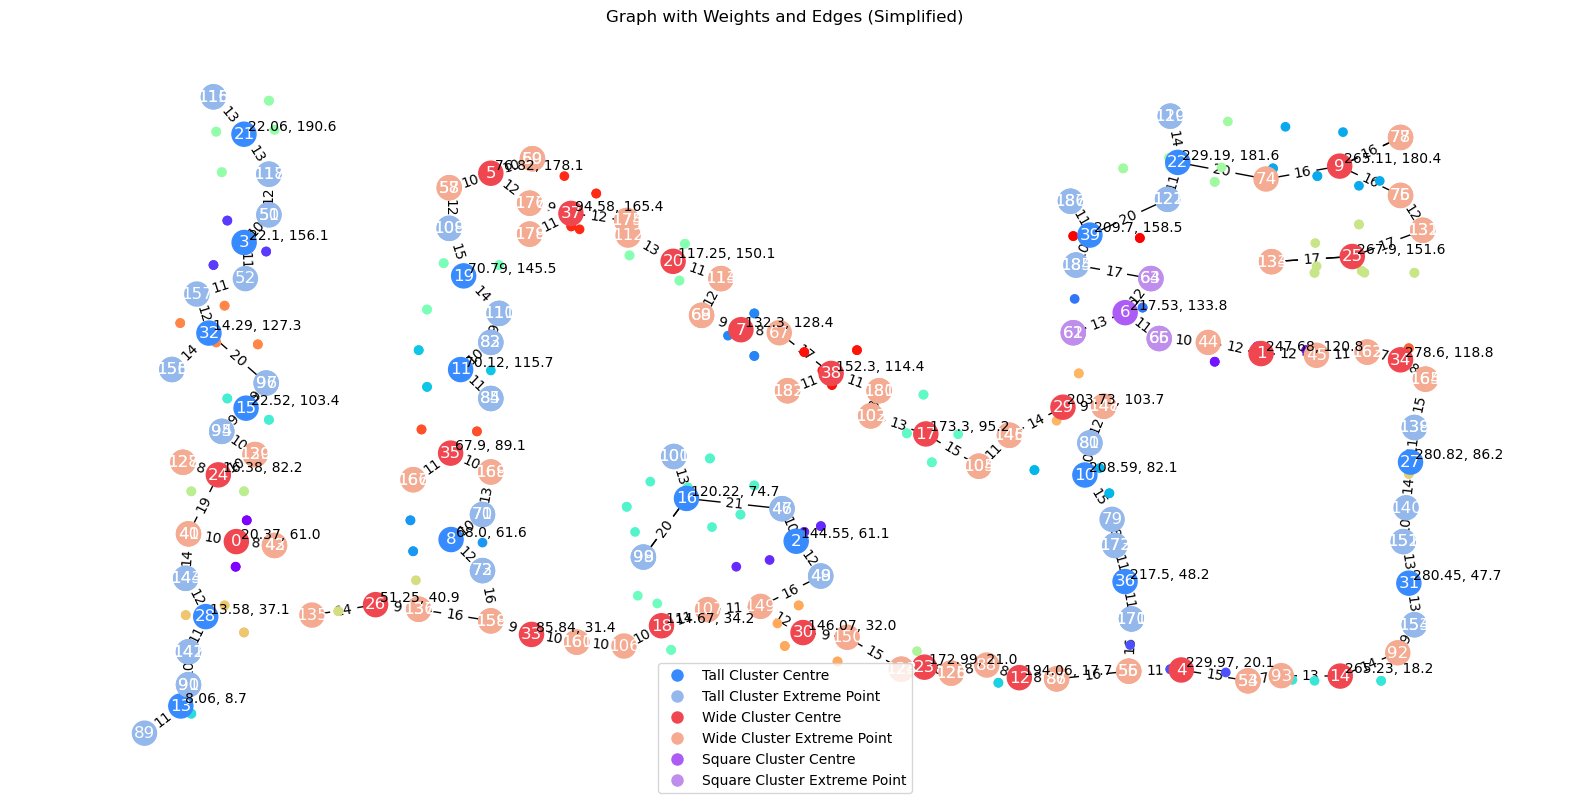

In [21]:
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = np.array(points)
blue = (56/255, 139/255,255/255)
lightblue = (148/255, 184/255,235/255)
red = (240/255, 70/255, 80/255)
lightred = (245/255, 170/255,146/255)
purple = (173/255, 91/255,245/255) 
lightpurple = (191/255, 141/255,235/255)

# Define the number of clusters
n_clusters = 40

# Use KMeans to cluster points
kmeans = KMeans(n_clusters=n_clusters).fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a list of clusters where each cluster is a list of its points
clusters = [data[labels == i] for i in range(n_clusters)]

# Create a graph
G = nx.Graph()

# define a tolerance to determine a tall, wide, or square cluster
tolerance = 1.05

# Add nodes to the graph for centers and extreme points
node_pos = {}  # store positions of all nodes
node_colors = {}  # store colors of all nodes
added_extreme_nodes_counter = len(clusters)
cluster_nodes = {}  # store node indices for each cluster (eligible)
all_cluster_nodes = {}


for i, cluster in enumerate(clusters):
    # center node
    G.add_node(i)
    node_pos[i] = centers[i]
    cluster_nodes[i] = [i]  # start a new entry in cluster_nodes with the center node
    all_cluster_nodes[i] = list(cluster)

    # print(f"Node {i} position: {node_pos[i]}") 


    # Find the extreme points
    min_x, min_y = np.min(cluster, axis=0)
    max_x, max_y = np.max(cluster, axis=0)

    # Determine the "shape" of the cluster
    if (max_y - min_y) > tolerance*(max_x - min_x):  # tall cluster
        extreme_points = cluster[np.logical_or(cluster[:, 1] == min_y, cluster[:, 1] == max_y)]
        node_colors[i] = blue  # center of tall cluster
        extreme_nodes_color = lightblue
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)         
            
            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])
    elif (max_x - min_x) > tolerance*(max_y - min_y):  # wide cluster
        extreme_points = cluster[np.logical_or(cluster[:, 0] == min_x, cluster[:, 0] == max_x)]
        node_colors[i] = red # center of wide cluster
        extreme_nodes_color = lightred
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


    else: #square cluster
        extreme_points = cluster[np.logical_or.reduce((cluster[:, 0] == min_x, cluster[:, 0] == max_x,
                                                      cluster[:, 1] == min_y, cluster[:, 1] == max_y))]
        node_colors[i] = purple  # center of square cluster
        extreme_nodes_color = lightpurple
        for point in extreme_points:
            G.add_node(added_extreme_nodes_counter)  # add extreme point as a node
            node_pos[added_extreme_nodes_counter] = point  # store its position
            # print(f"Node {added_extreme_nodes_counter} position: {node_pos[added_extreme_nodes_counter]}")
            node_colors[added_extreme_nodes_counter] = extreme_nodes_color  # extreme point
            # Add extreme node to cluster_nodes
            cluster_nodes[i].append(added_extreme_nodes_counter)
            # Compute the distance between the center and this extreme point
            distance = np.linalg.norm(centers[i] - point)
            # Add an edge between the center and this extreme point
            G.add_edge(i, added_extreme_nodes_counter, weight=distance)

            added_extreme_nodes_counter += 1
        extreme_points = np.vstack([extreme_points, centers[i]])


# Define a distance threshold for adjacency
inter_cluster_threshold_any = 20 # distances between any two nodes in different clusters
intra_cluster_threshold = 18 # distances between any two nodes in the same cluster
inter_cluster_threshold = 22 # distances between center/extreme nodes in different clusters


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)
        
        # Get indices of distances that are less than the threshold
        close_indices = np.where(distances < inter_cluster_threshold)
        
        # If there are any distances less than the threshold
        if close_indices[0].size > 0:
            for k in range(close_indices[0].size):
                # print(f"nodes {cluster_nodes[i][close_indices[0][k]]} from cluster {i} and {cluster_nodes[j][close_indices[1][k]]} from cluster {j} are close enough to be adjacent with distance {distances[close_indices[0][k], close_indices[1][k]]}")
                
                # If the nodes are not from the same cluster, add an edge between these nodes
                if i != j:
                    G.add_edge(cluster_nodes[i][close_indices[0][k]], cluster_nodes[j][close_indices[1][k]], weight=distances[close_indices[0][k], close_indices[1][k]])
                    # print(f"added edge between {cluster_nodes[i][close_indices[0][k]]} and {cluster_nodes[j][close_indices[1][k]]}")
        # else:
            # print(f"clusters {i} and {j} are not close enough to be adjacent")


# Compute the pairwise distances using cdist
extreme_points_indices = list(range(n_clusters, added_extreme_nodes_counter))
distances = cdist([node_pos[i] for i in extreme_points_indices], [node_pos[i] for i in extreme_points_indices])

# # For each pair of nodes
# for i in range(len(extreme_points_indices)):
#     for j in range(i+1, len(extreme_points_indices)):  # avoid duplicate comparisons and self-comparisons
#         # If the distance is less than the threshold, add an edge
#         if distances[i, j] < inter_cluster_threshold:
#             G.add_edge(extreme_points_indices[i], extreme_points_indices[j], weight=distances[i, j])
#             print(f"added edge between {extreme_points_indices[i]} and {extreme_points_indices[j]}")


for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        eligible_node_pos_cluster_i = [node_pos[node] for node in cluster_nodes[i]]
        eligible_node_pos_cluster_j = [node_pos[node] for node in cluster_nodes[j]]
        distances_eligible = cdist(eligible_node_pos_cluster_i, eligible_node_pos_cluster_j)

        all_node_pos_cluster_i = all_cluster_nodes[i]
        all_node_pos_cluster_j = all_cluster_nodes[j]
        distances_all = cdist(all_node_pos_cluster_i, all_node_pos_cluster_j)

        
        # If the minimum distance is less than the threshold
        # if np.min(distances_eligible) < inter_cluster_threshold or np.min(distances_all) < inter_cluster_threshold_any:
            # If the nodes are not from the same cluster, add an edge between these nodes' centers

            # if i != j:
                # measure distance between center[i] and center[j]
                # G.add_edge(i, j, weight=np.linalg.norm(centers[i] - centers[j]))
                # print(f"added edge between {min_dist_node_i} and {min_dist_node_j}")

# remove self loops
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)



# PLOT
fig, axs = plt.subplots(1, 3, figsize=(25, 5));

axs[0].set_title('Processed points and clusters')
axs[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)

axs[1].set_title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, ax=axs[1], font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels, ax=axs[1]);


axs[2].set_title('Nodes formed from cluster centroids and extreme points')
axs[2].scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.3, marker = '*')
nx.draw_networkx_nodes(G, node_pos, node_color=list(node_colors.values()), ax=axs[2], node_size=100)
# set legend for axs[1]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tall Cluster Centre', markerfacecolor=blue, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Tall Cluster Extreme Point', markerfacecolor=lightblue, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Centre', markerfacecolor=red, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Wide Cluster Extreme Point', markerfacecolor=lightred, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Centre', markerfacecolor=purple, markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Square Cluster Extreme Point', markerfacecolor=lightpurple, markersize=10)]
axs[2].legend( handles = legend_elements,loc="lower center", bbox_to_anchor=(0.5, -0.5, 0, 0)) # add legend to axs[1]


for ax in axs:
    ax.grid(True, which='both')
    # show axis numbers
    
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges')
nx.draw(G, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels);
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)
# show axis numbers and ticks




# Print nodes that are connected with each other
# for edge in G.edges:
#     node_1, node_2 = edge
#     if ((node_1 in cluster_nodes[0] and node_2 in cluster_nodes[1]) or 
#        (node_1 in cluster_nodes[1] and node_2 in cluster_nodes[0])):
#         print(f"Nodes {node_1} and {node_2} are connected")

for i, center in enumerate(centers):
    plt.text(center[0]+1, center[1]+1, str(f"{round(center[0], 2)}, {round(center[1], 1)}"), fontsize=10)
# for i, extreme_point in enumerate(extreme_points):
#     plt.text(extreme_point[0]+5, extreme_point[1]+5, str(f"{round(extreme_point[0], 2)}, {round(extreme_point[1], 1)}"), fontsize=10, color='darkgray')

plt.legend(handles = legend_elements,loc="lower center")
plt.show()

T = nx.minimum_spanning_tree(G, weight='weight')
plt.figure(figsize=(20, 10))
plt.title('Graph with Weights and Edges (Simplified)')
nx.draw(T, node_pos, with_labels=True, font_color='white', node_color=list(node_colors.values()))
edge_labels = nx.get_edge_attributes(T, 'weight')
edge_labels = {k: int(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(T, node_pos, edge_labels=edge_labels);
plt.legend(handles = legend_elements,loc="lower center")
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=1)

for i, center in enumerate(centers):
    plt.text(center[0]+1, center[1]+1, str(f"{round(center[0], 2)}, {round(center[1], 1)}"), fontsize=10)

In [11]:
import json
graph_d = {(18.74, 68.95): {(19.23, 95.41): 9.41, (15.67, 42.49): 10.95}, (264.79, 148.27): {(273.06, 173.88): 11.36}, (144.55, 61.07): {(114.67, 34.17): 15.05, (108.81, 64.03): 20.83, (146.07, 32.01): 10.55, (124.97, 79.13): 9.41}, (74.51, 154.46): {(69.1, 124.07): 15.21, (105.19, 160.51): 9.55, (81.01, 175.65): 9.84}, (217.09, 51.06): {(205.73, 93.93): 8.33, (216.43, 20.39): 8.31}, (8.54, 13.58): {(15.67, 42.49): 11.7}, (22.06, 190.56): {(22.1, 156.1): 12.92}, (64.51, 72.64): {(67.38, 54.75): 8.92, (72.2, 95.56): 13.67}, (144.46, 116.47): {(126.68, 137.41): 8.28, (163.72, 109.86): 10.04}, (279.94, 67.72): {(274.12, 23.21): 13.28, (279.37, 113.4): 14.82}, (205.73, 93.93): {(217.09, 51.06): 8.33, (176.48, 90.64): 11.38, (217.53, 133.78): 12.98}, (178.83, 19.85): {(146.07, 32.01): 14.36, (216.43, 20.39): 12.98}, (114.67, 34.17): {(144.55, 61.07): 15.05, (85.84, 31.42): 10.53, (108.81, 64.03): 12.36, (146.07, 32.01): 11.79}, (16.25, 124.84): {(22.1, 156.1): 9.77, (19.23, 95.41): 9.93}, (274.12, 23.21): {(279.94, 67.72): 13.28, (249.28, 17.43): 4.96}, (209.7, 158.46): {(217.53, 133.78): 10.77, (227.24, 177.05): 13.75}, (273.06, 173.88): {(264.79, 148.27): 11.36, (242.1, 186.98): 10.14}, (247.68, 120.77): {(217.53, 133.78): 10.94, (279.37, 113.4): 11.32}, (85.84, 31.42): {(114.67, 34.17): 10.53, (67.38, 54.75): 16.1, (50.13, 39.92): 16.42}, (242.1, 186.98): {(273.06, 173.88): 10.14, (227.24, 177.05): 4.86}, (69.1, 124.07): {(74.51, 154.46): 15.21, (72.2, 95.56): 8.92}, (105.19, 160.51): {(74.51, 154.46): 9.55, (126.68, 137.41): 11.75, (81.01, 175.65): 8.98}, (176.48, 90.64): {(205.73, 93.93): 11.38, (163.72, 109.86): 9.73}, (108.81, 64.03): {(144.55, 61.07): 20.83, (114.67, 34.17): 12.36, (124.97, 79.13): 9.55}, (67.38, 54.75): {(64.51, 72.64): 8.92, (85.84, 31.42): 16.1, (50.13, 39.92): 9.25}, (217.53, 133.78): {(205.73, 93.93): 12.98, (209.7, 158.46): 10.77, (247.68, 120.77): 10.94}, (249.28, 17.43): {(274.12, 23.21): 4.96, (216.43, 20.39): 12.35}, (126.68, 137.41): {(144.46, 116.47): 8.28, (105.19, 160.51): 11.75}, (146.07, 32.01): {(144.55, 61.07): 10.55, (178.83, 19.85): 14.36, (114.67, 34.17): 11.79}, (279.37, 113.4): {(279.94, 67.72): 14.82, (247.68, 120.77): 11.32}, (22.1, 156.1): {(22.06, 190.56): 12.92, (16.25, 124.84): 9.77}, (72.2, 95.56): {(64.51, 72.64): 13.67, (69.1, 124.07): 8.92}, (227.24, 177.05): {(209.7, 158.46): 13.75, (242.1, 186.98): 4.86}, (81.01, 175.65): {(74.51, 154.46): 9.84, (105.19, 160.51): 8.98}, (163.72, 109.86): {(144.46, 116.47): 10.04, (176.48, 90.64): 9.73}, (50.13, 39.92): {(85.84, 31.42): 16.42, (67.38, 54.75): 9.25, (15.67, 42.49): 16.05}, (19.23, 95.41): {(18.74, 68.95): 9.41, (16.25, 124.84): 9.93}, (216.43, 20.39): {(217.09, 51.06): 8.31, (178.83, 19.85): 12.98, (249.28, 17.43): 12.35}, (15.67, 42.49): {(18.74, 68.95): 10.95, (8.54, 13.58): 11.7, (50.13, 39.92): 16.05}, (124.97, 79.13): {(144.55, 61.07): 9.41, (108.81, 64.03): 9.55}}

# generate node ids and coordinates
nodes = {id: [coord[0], coord[1]] for id, coord in enumerate(graph_d.keys(), 1)}
coord_to_id = {tuple(coord): id for id, coord in nodes.items()}

# create new graph using ids
new_graph = {id: {coord_to_id[neighbour]: weight for neighbour, weight in neighbours.items()} for id, neighbours in enumerate(graph_d.values(), 1)}

# convert to JSON
nodes_json = json.dumps(nodes, indent=4)
new_graph_json = json.dumps(new_graph, indent=4)

print("let nodes_object = ", nodes_json)
print("let graphs_object = ", new_graph_json)

let nodes_object =  {
    "1": [
        18.74,
        68.95
    ],
    "2": [
        264.79,
        148.27
    ],
    "3": [
        144.55,
        61.07
    ],
    "4": [
        74.51,
        154.46
    ],
    "5": [
        217.09,
        51.06
    ],
    "6": [
        8.54,
        13.58
    ],
    "7": [
        22.06,
        190.56
    ],
    "8": [
        64.51,
        72.64
    ],
    "9": [
        144.46,
        116.47
    ],
    "10": [
        279.94,
        67.72
    ],
    "11": [
        205.73,
        93.93
    ],
    "12": [
        178.83,
        19.85
    ],
    "13": [
        114.67,
        34.17
    ],
    "14": [
        16.25,
        124.84
    ],
    "15": [
        274.12,
        23.21
    ],
    "16": [
        209.7,
        158.46
    ],
    "17": [
        273.06,
        173.88
    ],
    "18": [
        247.68,
        120.77
    ],
    "19": [
        85.84,
        31.42
    ],
    "20": [
        242.1,
        186.98
    ],
    "21"

In [12]:
p = [(0, 0), (15.74, 12.24), (26.51, 20.61), (38.46, 29.58), (42.65, 43.93), (38.46, 62.47), (36.07, 89.98), (38.46, 121.07), (42.65, 150.97), (44.44, 171.3), (61.79, 170.11), (80.32, 169.51), (92.88, 168.91), (113.81, 164.72), (113.81, 150.37), (112.02, 133.03), (112.61, 123.46), (113.21, 109.11), (112.02, 94.76), (113.81, 77.42), (119.19, 61.28), (126.96, 53.5), (134.74, 41.54), (150, 50), (141.91, 60.08), (131.15, 84.6), (126.96, 109.71), (147.89, 112.7), (165.23, 114.5), (204.1, 114.5), (187.36, 116.89), (204.7, 139.61), (208.89, 159.94), (213.67, 187.45), (211.88, 214.36), (211.28, 228.11), (211.88, 243.06), (191.55, 243.06), (178.39, 243.66), (155.67, 243.66), (143.11, 229.9), (122.78, 248.44), (122.18, 233.49), (100, 250), (88.1, 242.46), (86.9, 231.1), (86.3, 220.34), (82.12, 209.57), (79.72, 192.83), (92.88, 188.64), (110.82, 188.64), (124.57, 185.65), (125.17, 176.09), (135.93, 174.29), (152.68, 174.89), (176, 172.5), (193.94, 169.51), (228.62, 170.11), (277.06, 166.52), (248.95, 168.91), (299.78, 161.14), (289.61, 145.59), (290.21, 130.64), (283.04, 118.68), (269.28, 116.89), (242.97, 119.28), (225.63, 119.28), (210.68, 103.73), (186.76, 104.93), (100.65, 110.91), (89.89, 110.31), (79.13, 111.51), (73.75, 112.1), (61.19, 112.7), (51.62, 112.7), (50, 100), (55.21, 87.59), (51.62, 75.03), (50, 50), (50.42, 61.87), (54.01, 37.95), (70.16, 40.35), (82.71, 37.36), (114.41, 39.15), (99.46, 43.34), (145.5, 35.56), (157.46, 37.95), (183.77, 35.56), (205.3, 33.77), (233.4, 27.19), (260.31, 29.58), (292.6, 28.99)]

# convert p to a json object like {{x: 0, y: 0}, {x: 1, y: 1}, ...}
p_json = json.dumps([{"x": x, "y": y} for x, y in p], indent=4)
print("let p = ", p_json)

let p =  [
    {
        "x": 0,
        "y": 0
    },
    {
        "x": 15.74,
        "y": 12.24
    },
    {
        "x": 26.51,
        "y": 20.61
    },
    {
        "x": 38.46,
        "y": 29.58
    },
    {
        "x": 42.65,
        "y": 43.93
    },
    {
        "x": 38.46,
        "y": 62.47
    },
    {
        "x": 36.07,
        "y": 89.98
    },
    {
        "x": 38.46,
        "y": 121.07
    },
    {
        "x": 42.65,
        "y": 150.97
    },
    {
        "x": 44.44,
        "y": 171.3
    },
    {
        "x": 61.79,
        "y": 170.11
    },
    {
        "x": 80.32,
        "y": 169.51
    },
    {
        "x": 92.88,
        "y": 168.91
    },
    {
        "x": 113.81,
        "y": 164.72
    },
    {
        "x": 113.81,
        "y": 150.37
    },
    {
        "x": 112.02,
        "y": 133.03
    },
    {
        "x": 112.61,
        "y": 123.46
    },
    {
        "x": 113.21,
        "y": 109.11
    },
    {
        "x": 112.02,
        "y": 94.76
